
This Dataset is a a combination of ground data labels collected from Mtwara Region in Tanzania on Cashew Nut trees and non cashew (non cashew trees, shrubs, bushes, and undergrowth/grass)

Date is Clustered to Just September to December 2022


***Objective of Analysis: Analyse One Single Region - Nanyamba

*   observe some abnormality
*   shift in seasonality,
*   ndvi, evi trend per cluster of target,
*   find cluster with best correlation
*   (1st analysis, cluster(2nd analysis,(look at correlations), spectral bands
*   indices(ndvi, etc)

In [ ]:
# crop type model- priority
# biomass model to be improved
#

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from PIL import Image
import pandas as pd
import json
import sys
sys.path.append('/content/drive/MyDrive/mavuno')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
#from mavuno.raster import rasterize_polygon
#from mavuno.sentinel2 import open_region_climatology, S2Basic ,BAND_KEYS
#from convolve2d_masked import moving_averages_masked
##from cashew_mask import predict_cashew_mask
#from tree_biomass_map import cashew_tree_biomass_map
#from pandas_profiling import ProfileReport
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') #don't display warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_Mavuno/Undergrowth/Undergrowths-S2/Crop_classification_March_2023/nanyamba_main_df.csv')
df.head(5)

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,B9,CLD,SCL,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year
0,887,0.151550,0.361650,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,...,0.347900,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.292298,1.0,2022.0
1,888,0.151150,0.376050,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,...,0.345550,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.283437,1.0,2022.0
2,889,0.150975,0.376650,0.260475,0.147650,0.162300,0.16930,0.213425,0.26845,0.298075,...,0.346075,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.296123,1.0,2022.0
3,890,0.162250,0.378725,0.264825,0.160000,0.171000,0.17690,0.217950,0.26555,0.288400,...,0.337750,0.0,4.0,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.265975,1.0,2022.0
4,891,0.176025,0.394000,0.287075,0.174575,0.183725,0.18585,0.224650,0.27240,0.300475,...,0.346750,0.0,4.0,Nanyamba TC 03-09,2022-09-29 07:42:50,272.0,9.0,0.262793,1.0,2022.0


In [ ]:
#df['polygon_cluster'] = df['cluster'].str.replace(r'\D+', '')

In [ ]:
df.head()

,Unnamed: 0,B1,B11,B12,B2,B3,B4,B5,B6,B7,...,B9,CLD,SCL,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year
0,887,0.151550,0.361650,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,...,0.347900,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.292298,1.0,2022.0
1,888,0.151150,0.376050,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,...,0.345550,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.283437,1.0,2022.0
2,889,0.150975,0.376650,0.260475,0.147650,0.162300,0.16930,0.213425,0.26845,0.298075,...,0.346075,0.0,4.0,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.296123,1.0,2022.0
3,890,0.162250,0.378725,0.264825,0.160000,0.171000,0.17690,0.217950,0.26555,0.288400,...,0.337750,0.0,4.0,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.265975,1.0,2022.0
4,891,0.176025,0.394000,0.287075,0.174575,0.183725,0.18585,0.224650,0.27240,0.300475,...,0.346750,0.0,4.0,Nanyamba TC 03-09,2022-09-29 07:42:50,272.0,9.0,0.262793,1.0,2022.0


In [ ]:
#data_1=df

In [ ]:
#data_1 = data_1.melt(data=data_1,
   #                  id_vars=['datatime'],
                 #  value_name='cluster_1',
                   #value_vars=["Mtwara DC 01-11", "Mtwara DC 01-12", "Mtwara DC 02-09", "Mtwara DC 02-09(max_cc=10)",
                              # "Mtwara DC 02-10", "Mtwara DC 03-08", "Mtwara DC 03-10", "Mtwara DC 03-14", "Mtwara DC 04-13",
                              # "Mtwara DC 04-14", "Mtwara DC 05-14",
                              # "Mtwara MC 02-13"])



In [ ]:
#trees_df = trees_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
trees_df = df

In [ ]:
trees_df.columns

Index(['Unnamed: 0', 'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'CLD', 'SCL', 'Nanyamba_cluster', 'datetime',
       'day of year', 'month', 'ndvi', 'target', 'year'],
      dtype='object')

In [ ]:
# relieve noisy columns
trees_df = trees_df.drop(['Unnamed: 0', 'SCL', 'CLD'], axis=1)

In [ ]:
# dropping any duplicates
trees_df = trees_df.drop_duplicates()

In [ ]:
# compute ndvi and evi based on spectral bands 8 and 4
trees_df['evi'] = 2.5*(trees_df.B8A - trees_df.B4)/(trees_df.B8A + (6*trees_df.B4) - (7.5*trees_df.B4) +1)
trees_df['ndvi'] = (trees_df.B8A - trees_df.B4) /  (trees_df.B8A + trees_df.B4)

In [ ]:
#trees_df.rename({'undergrowth_type_map':'undergrowth_type', 'undergrowth_height_map':'undergrowth_height', 'undergrowth_type_map_ma':'undergrowth_type_ma', 'undergrowth_height_map_ma':'undergrowth_height_ma', 'cashew_mask_ma': 'cashew_ma' }, axis=1, inplace=True)
print(trees_df.columns)

Index(['B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A',
       'B9', 'Nanyamba_cluster', 'datetime', 'day of year', 'month', 'ndvi',
       'target', 'year', 'evi'],
      dtype='object')


In [ ]:
trees_df.head(2)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.15155,0.36165,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,0.30495,0.33225,0.34790,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.330996,1.0,2022.0,0.381904
1,0.15115,0.37605,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,0.30995,0.33765,0.34555,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.322303,1.0,2022.0,0.381699


In [ ]:
trees_df.head(5)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.151550,0.361650,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,0.30495,0.332250,0.347900,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.330996,1.0,2022.0,0.381904
1,0.151150,0.376050,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,0.30995,0.337650,0.345550,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.322303,1.0,2022.0,0.381699
2,0.150975,0.376650,0.260475,0.147650,0.162300,0.16930,0.213425,0.26845,0.298075,0.31175,0.339100,0.346075,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.333989,1.0,2022.0,0.391190
3,0.162250,0.378725,0.264825,0.160000,0.171000,0.17690,0.217950,0.26555,0.288400,0.30510,0.332625,0.337750,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.305628,1.0,2022.0,0.364772
4,0.176025,0.394000,0.287075,0.174575,0.183725,0.18585,0.224650,0.27240,0.300475,0.31835,0.341400,0.346750,Nanyamba TC 03-09,2022-09-29 07:42:50,272.0,9.0,0.295021,1.0,2022.0,0.365957


In [ ]:
trees_df.head(5)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.151550,0.361650,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,0.30495,0.332250,0.347900,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.330996,1.0,2022.0,0.381904
1,0.151150,0.376050,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,0.30995,0.337650,0.345550,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.322303,1.0,2022.0,0.381699
2,0.150975,0.376650,0.260475,0.147650,0.162300,0.16930,0.213425,0.26845,0.298075,0.31175,0.339100,0.346075,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.333989,1.0,2022.0,0.391190
3,0.162250,0.378725,0.264825,0.160000,0.171000,0.17690,0.217950,0.26555,0.288400,0.30510,0.332625,0.337750,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.305628,1.0,2022.0,0.364772
4,0.176025,0.394000,0.287075,0.174575,0.183725,0.18585,0.224650,0.27240,0.300475,0.31835,0.341400,0.346750,Nanyamba TC 03-09,2022-09-29 07:42:50,272.0,9.0,0.295021,1.0,2022.0,0.365957


In [ ]:
trees_df.shape

(3057, 20)

In [ ]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3057 entries, 0 to 3056
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   B1                3057 non-null   float64
 1   B11               3057 non-null   float64
 2   B12               3057 non-null   float64
 3   B2                3057 non-null   float64
 4   B3                3057 non-null   float64
 5   B4                3057 non-null   float64
 6   B5                3057 non-null   float64
 7   B6                3057 non-null   float64
 8   B7                3057 non-null   float64
 9   B8                3057 non-null   float64
 10  B8A               3057 non-null   float64
 11  B9                3057 non-null   float64
 12  Nanyamba_cluster  3057 non-null   object 
 13  datetime          3057 non-null   object 
 14  day of year       3057 non-null   float64
 15  month             3057 non-null   float64
 16  ndvi              3057 non-null   float64


In [ ]:
trees_df.describe().T

,count,mean,std,min,25%,50%,75%,max
B1,3057.0,0.166884,0.017582,0.125875,0.154000,0.164425,0.176950,0.261075
B11,3057.0,0.414152,0.051475,0.000000,0.384350,0.413775,0.444375,0.551025
B12,3057.0,0.303722,0.043079,0.142725,0.272925,0.299300,0.331525,0.457725
B2,3057.0,0.166915,0.018428,0.000000,0.154900,0.165700,0.176975,0.262100
B3,3057.0,0.190528,0.019059,0.130225,0.176425,0.188125,0.201900,0.269400
B4,3057.0,0.194110,0.023506,0.125825,0.177175,0.190150,0.207750,0.296750
B5,3057.0,0.252318,0.027702,0.148125,0.230475,0.249375,0.272175,0.369325
B6,3057.0,0.333227,0.046932,0.188775,0.293725,0.334000,0.368725,0.507250
B7,3057.0,0.369760,0.052686,0.207750,0.326025,0.370300,0.408475,0.555250
B8,3057.0,0.383891,0.053276,0.209975,0.341075,0.384100,0.421900,0.590800


In [ ]:
# Correlations


In [ ]:
# The Correlations
pearsoncorr =trees_df.corr(method='pearson')
pearsoncorr

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,day of year,month,ndvi,target,year,evi
B1,1.000000,0.421456,0.442707,0.731191,0.722525,0.589212,0.610864,0.520604,0.518043,0.495886,0.534966,0.588104,-0.257814,-0.284448,-0.014493,0.162460,NaN,0.359445
B11,0.421456,1.000000,0.765058,0.446773,0.609352,0.681571,0.695056,0.509912,0.486553,0.494547,0.494735,0.461568,0.064492,0.065168,-0.145213,0.254640,NaN,0.273938
B12,0.442707,0.765058,1.000000,0.506413,0.711999,0.831159,0.827420,0.558999,0.517292,0.503885,0.491620,0.448451,0.133435,0.124176,-0.296752,0.408959,NaN,0.202522
B2,0.731191,0.446773,0.506413,1.000000,0.810626,0.736944,0.663798,0.496565,0.488829,0.470391,0.497051,0.514222,-0.116940,-0.170760,-0.198784,0.169688,NaN,0.248329
B3,0.722525,0.609352,0.711999,0.810626,1.000000,0.894800,0.924226,0.789720,0.762506,0.746166,0.752716,0.719950,-0.059359,-0.094351,-0.074134,0.373175,NaN,0.477827
B4,0.589212,0.681571,0.831159,0.736944,0.894800,1.000000,0.882491,0.589803,0.550895,0.538193,0.545127,0.517793,-0.015778,-0.025370,-0.403189,0.363337,NaN,0.188437
B5,0.610864,0.695056,0.827420,0.663798,0.924226,0.882491,1.000000,0.848617,0.814563,0.801725,0.806007,0.746791,0.002743,-0.011817,-0.003520,0.465560,NaN,0.547429
B6,0.520604,0.509912,0.558999,0.496565,0.789720,0.589803,0.848617,1.000000,0.992786,0.974386,0.979488,0.912701,-0.136144,-0.155838,0.476483,0.415289,NaN,0.880865
B7,0.518043,0.486553,0.517292,0.488829,0.762506,0.550895,0.814563,0.992786,1.000000,0.980414,0.990508,0.928209,-0.153290,-0.180309,0.526966,0.377474,NaN,0.911169
B8,0.495886,0.494547,0.503885,0.470391,0.746166,0.538193,0.801725,0.974386,0.980414,1.000000,0.980383,0.906707,-0.182606,-0.205157,0.527388,0.369352,NaN,0.905072


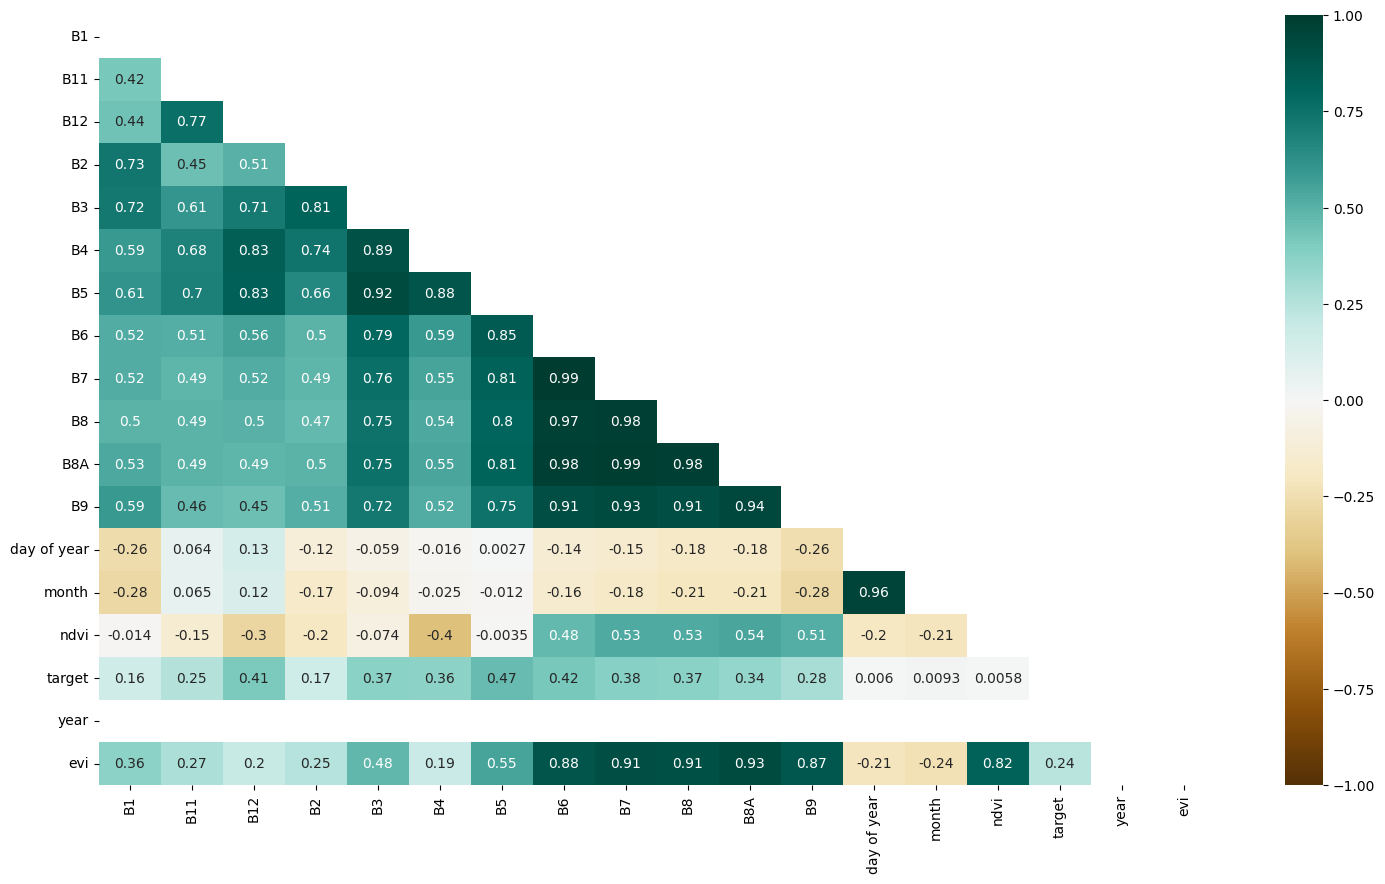

In [ ]:
plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(trees_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(trees_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
# find the maximum of each column
maxValues = trees_df.max()

print(maxValues)

B1                             0.261075
B11                            0.551025
B12                            0.457725
B2                               0.2621
B3                               0.2694
B4                              0.29675
B5                             0.369325
B6                              0.50725
B7                              0.55525
B8                               0.5908
B8A                            0.612775
B9                             0.601675
Nanyamba_cluster      Nanyamba TC 07-10
datetime            2022-12-28 07:42:49
day of year                       362.0
month                              12.0
ndvi                           0.532887
target                              1.0
year                             2022.0
evi                            0.785595
dtype: object


In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(trees_df, .9)

B8           evi      0.905072
             B9       0.906707
evi          B7       0.911169
B9           B6       0.912701
B3           B5       0.924226
evi          B8A      0.925102
B9           B7       0.928209
             B8A      0.943892
day of year  month    0.957994
B6           B8       0.974386
             B8A      0.979488
B8A          B8       0.980383
B8           B7       0.980414
B8A          B7       0.990508
B7           B6       0.992786
B1           B1            NaN
dtype: float64

In [ ]:
# looking for date with most value counts

In [ ]:
trees_df['datetime'].value_counts()

2022-11-13 07:42:53    201
2022-12-03 07:42:50    159
2022-11-28 07:42:49    158
2022-12-03 07:42:47    141
2022-11-28 07:42:46    140
2022-11-13 07:42:50    140
2022-12-18 07:42:49    128
2022-09-04 07:43:02    126
2022-10-19 07:42:49    118
2022-10-29 07:42:49    117
2022-11-08 07:42:49    116
2022-10-14 07:42:54    112
2022-11-08 07:42:46    100
2022-12-28 07:42:49     90
2022-10-19 07:42:46     89
2022-09-14 07:43:00     80
2022-09-19 07:42:48     80
2022-09-04 07:42:59     73
2022-10-29 07:42:46     68
2022-10-09 07:42:45     65
2022-10-09 07:42:48     63
2022-09-24 07:42:57     63
2022-10-04 07:42:54     60
2022-10-14 07:42:51     53
2022-10-24 07:42:49     49
2022-09-29 07:42:50     46
2022-12-18 07:42:46     40
2022-10-24 07:42:53     37
2022-11-18 07:42:47     36
2022-12-28 07:42:46     35
2022-11-03 07:42:54     34
2022-10-04 07:42:57     34
2022-09-29 07:42:47     33
2022-09-19 07:42:52     25
2022-11-23 07:42:50     23
2022-11-03 07:42:51     23
2022-09-24 07:42:54     21
2

In [ ]:
trees_df.isna().sum()

B1                  0
B11                 0
B12                 0
B2                  0
B3                  0
B4                  0
B5                  0
B6                  0
B7                  0
B8                  0
B8A                 0
B9                  0
Nanyamba_cluster    0
datetime            0
day of year         0
month               0
ndvi                0
target              0
year                0
evi                 0
dtype: int64

<Axes: >

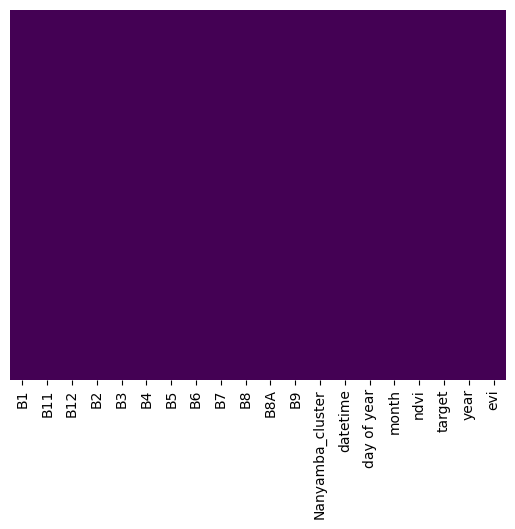

In [ ]:
sns.heatmap(trees_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
from scipy.stats import skew

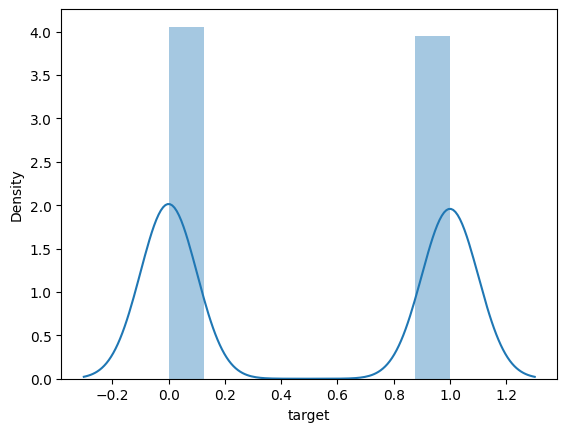

In [ ]:
sns.distplot(trees_df['target'])
plt.show()

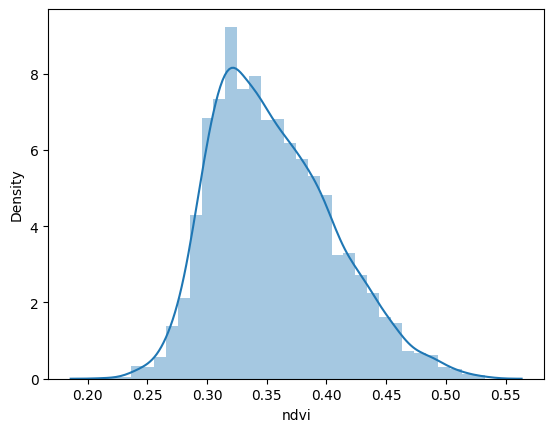

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

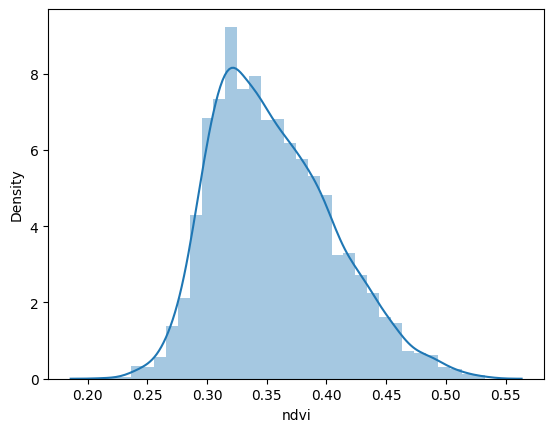

In [ ]:
sns.distplot(trees_df['ndvi'])
plt.show()

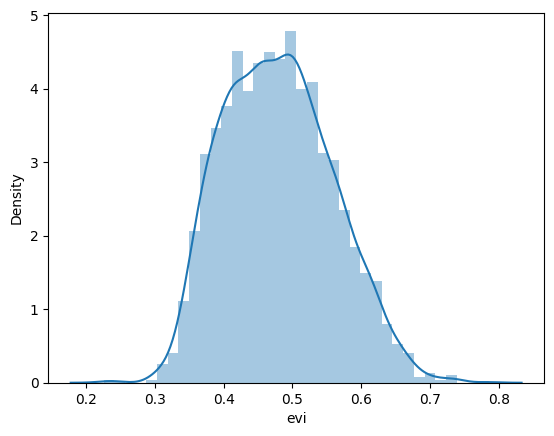

In [ ]:
sns.distplot(trees_df['evi'])
plt.show()

NameError: ignored

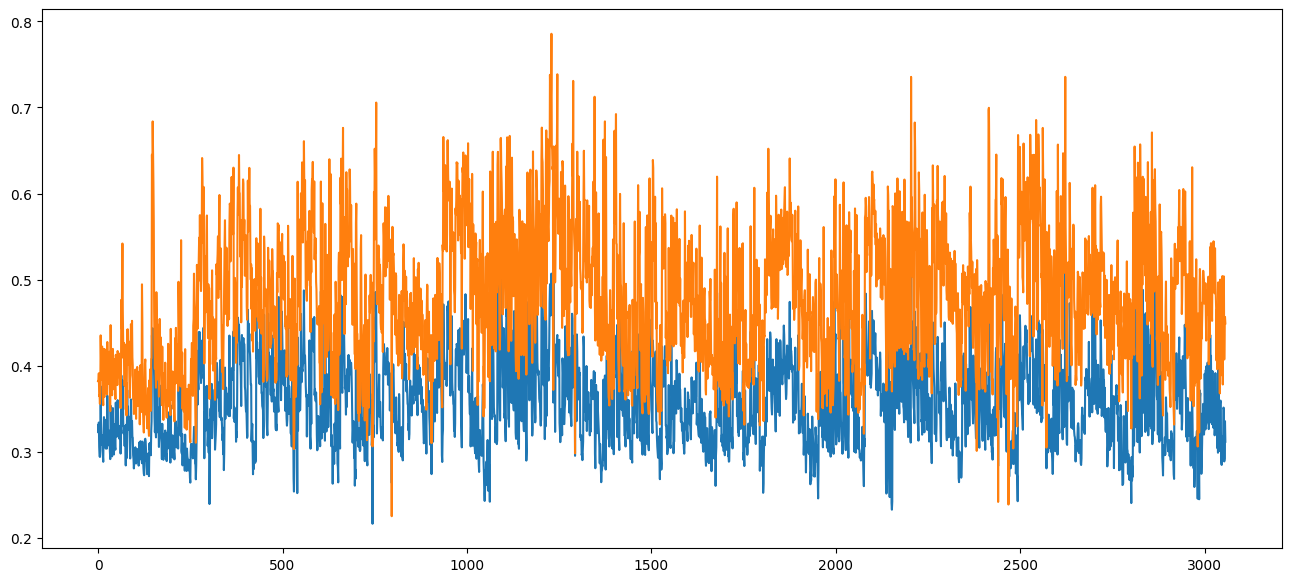

In [ ]:
fig, ax = plt.subplots(figsize = (16, 7))
# Add y-values
ax.plot("ndvi", data = trees_df, label = "ndvi")
ax.plot("evi", data = trees_df, label = "evi")
x.plot("month", data = trees_df, label = "month")
# Add y-values
#ax.plot("dbh", data = df, label = "dbh")
# Add legend
ax.legend()
#ax.set(title=' Biomass of Mango, Cashew and Palm trees by circumference at Breast Height')
# Add axis labels
ax.set_xlabel("ndvi", size = 14)
ax.set_xlabel("evi", size = 14)
ax.set_ylabel("month", size = 14)


In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="target").set(title='NDVI sequence of Cashew and non Cashew for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'EVI sequence of Cashew and non Cashew for Nanyamba Region in 2022')]

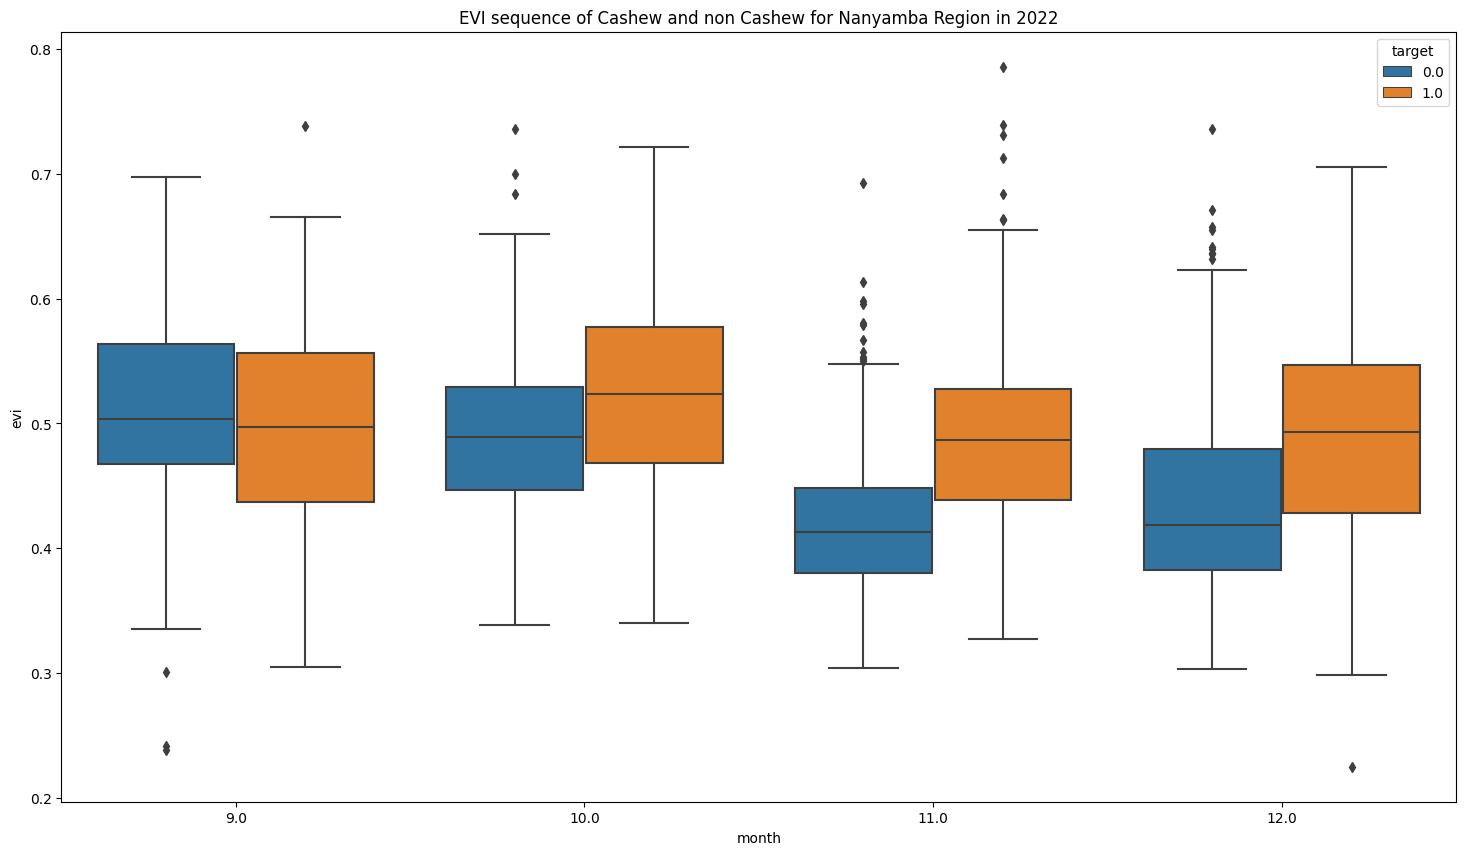

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="evi", hue="target").set(title='EVI sequence of Cashew and non Cashew for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B4 for Nanyamba Region in 2022')]

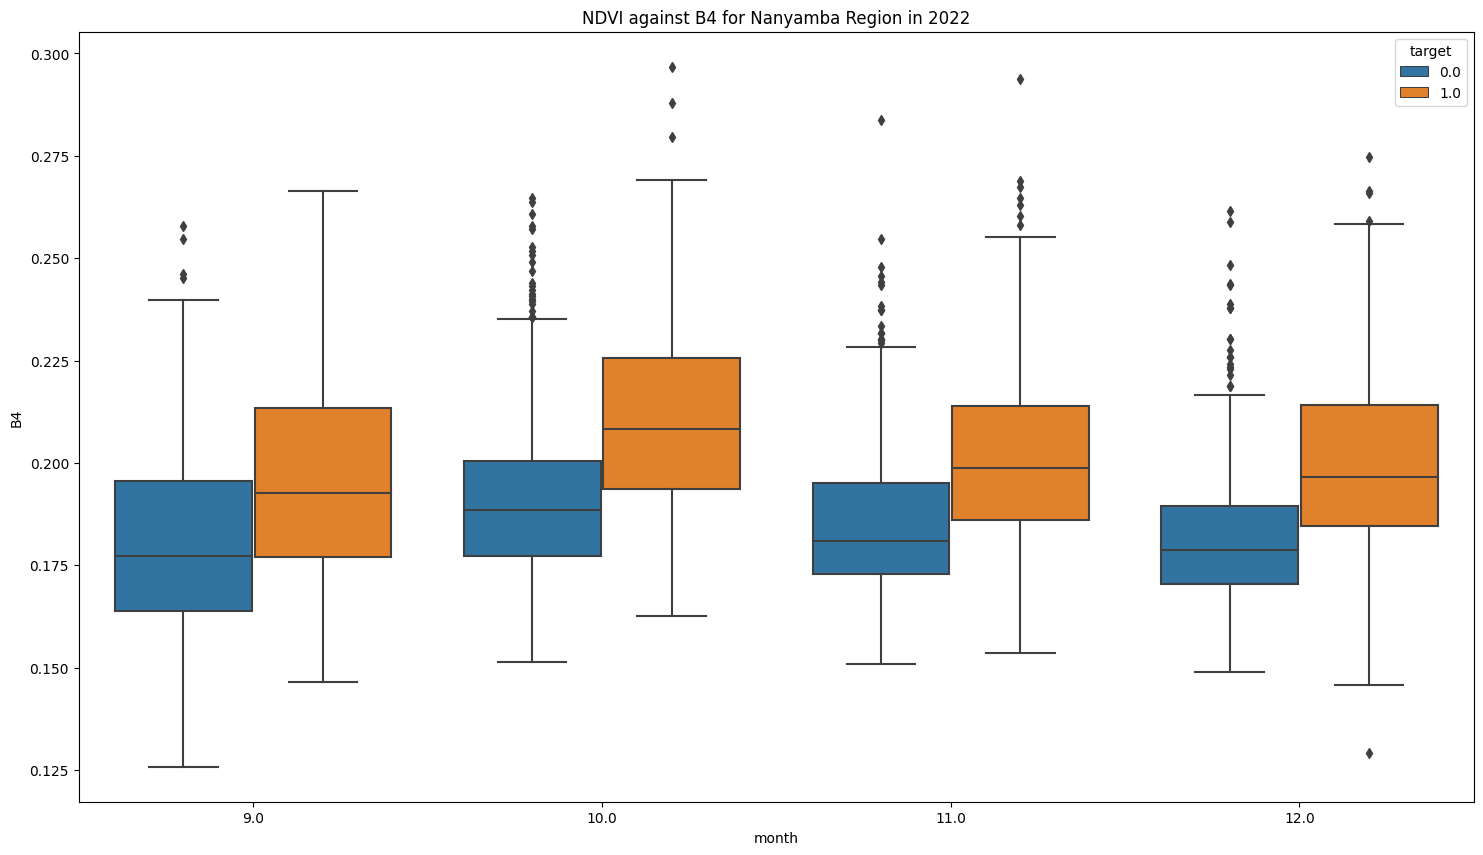

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B4", hue="target").set(title='NDVI against B4 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B5 for Nanyamba Region in 2022')]

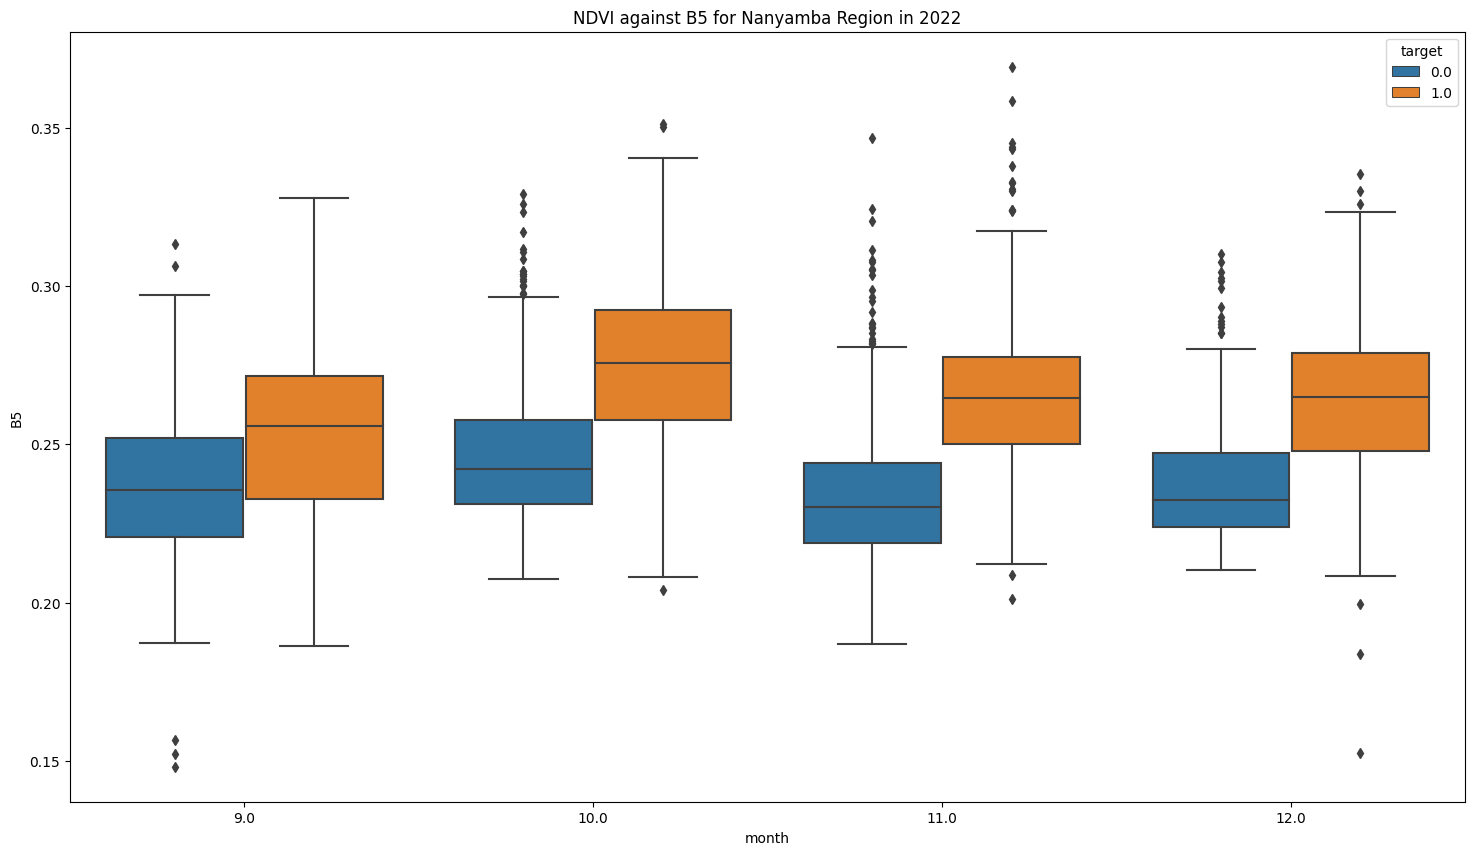

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B5", hue="target").set(title='NDVI against B5 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B6 for Nanyamba Region in 2022')]

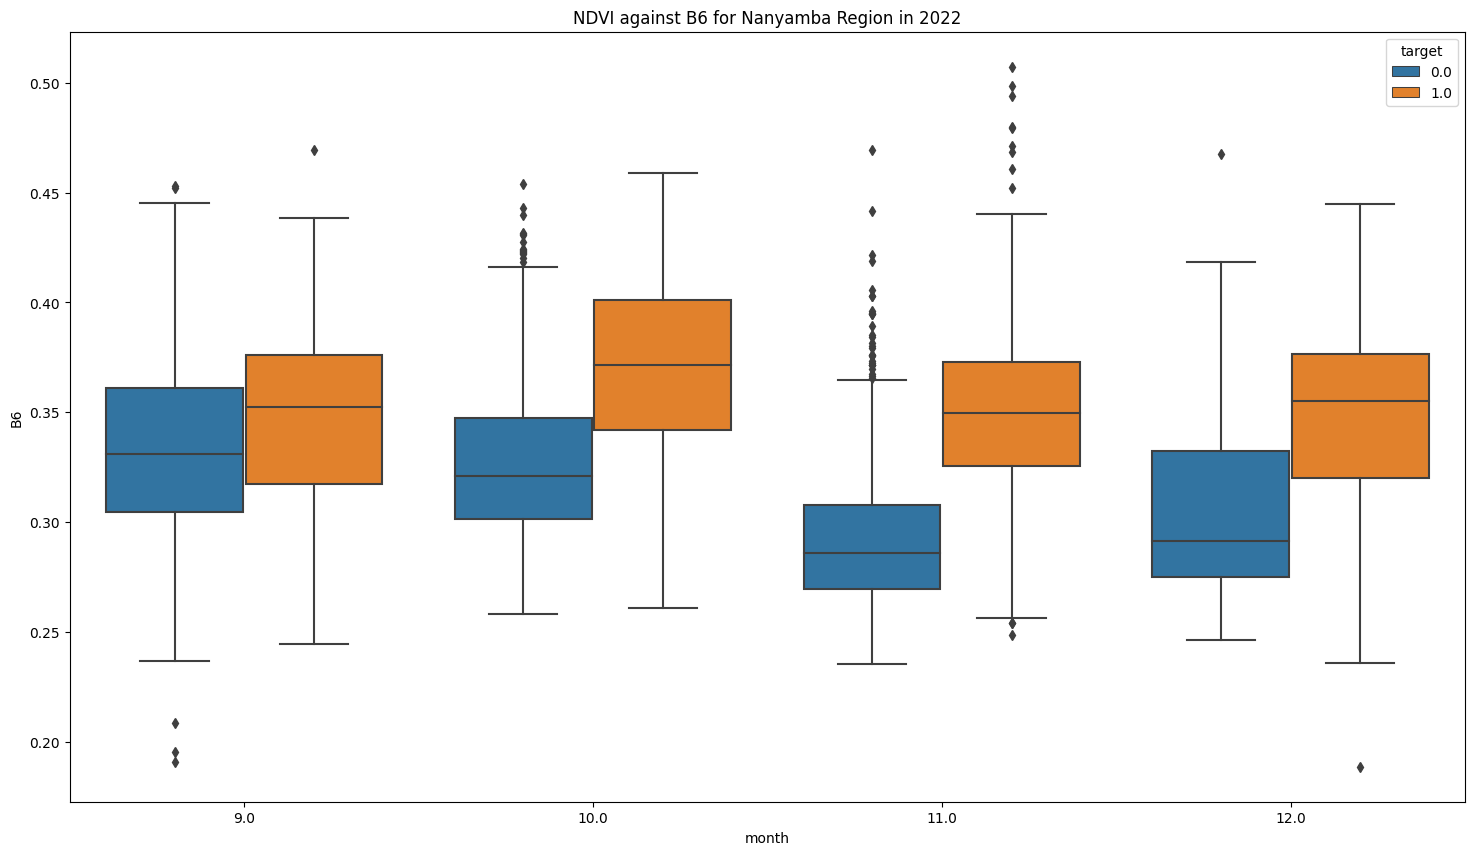

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B6", hue="target").set(title='NDVI against B6 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B7 for Nanyamba Region in 2022')]

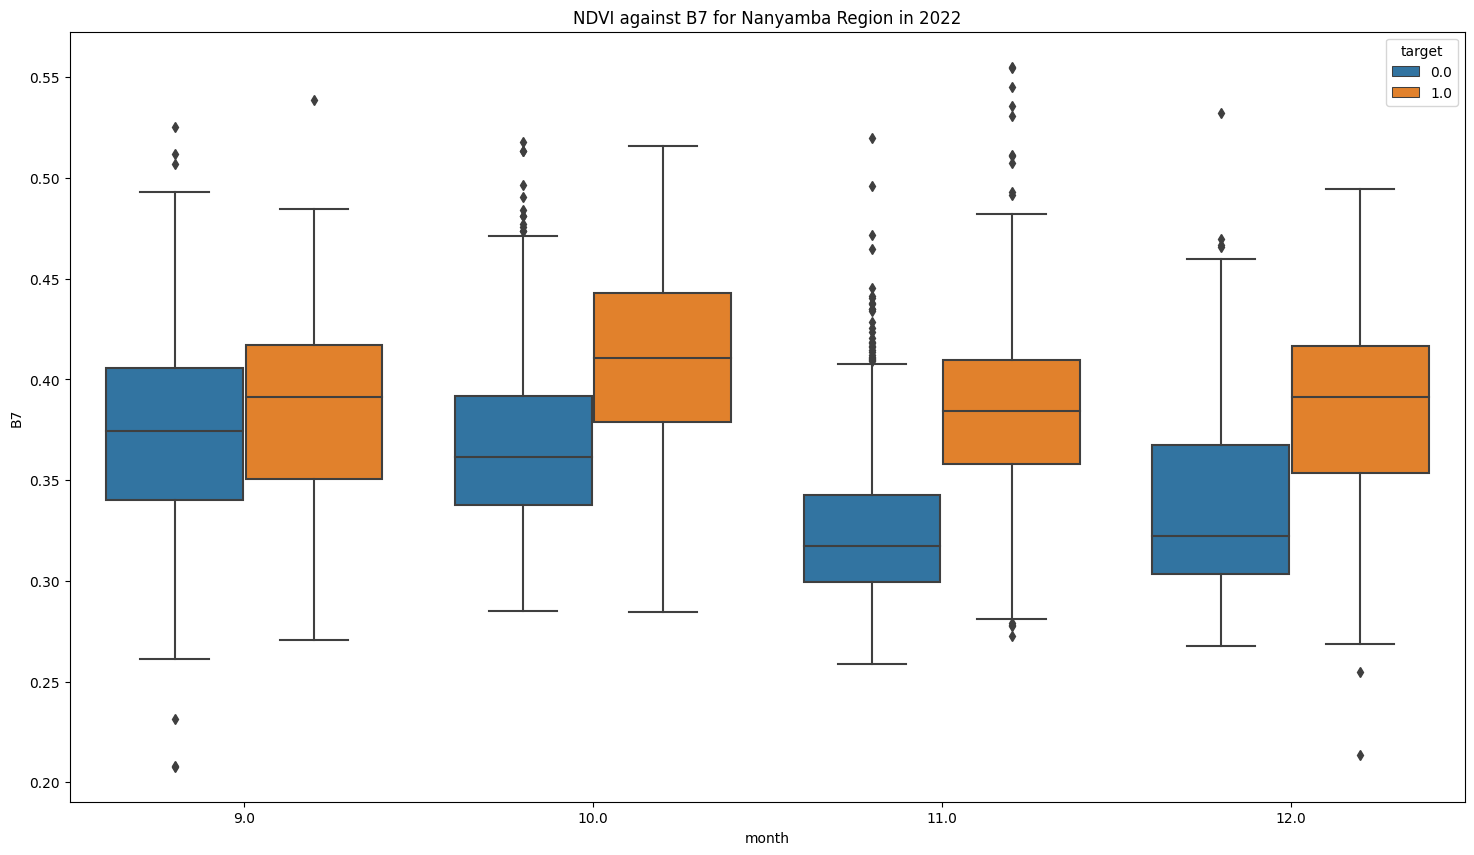

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B7", hue="target").set(title='NDVI against B7 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8 for Nanyamba Region in 2022')]

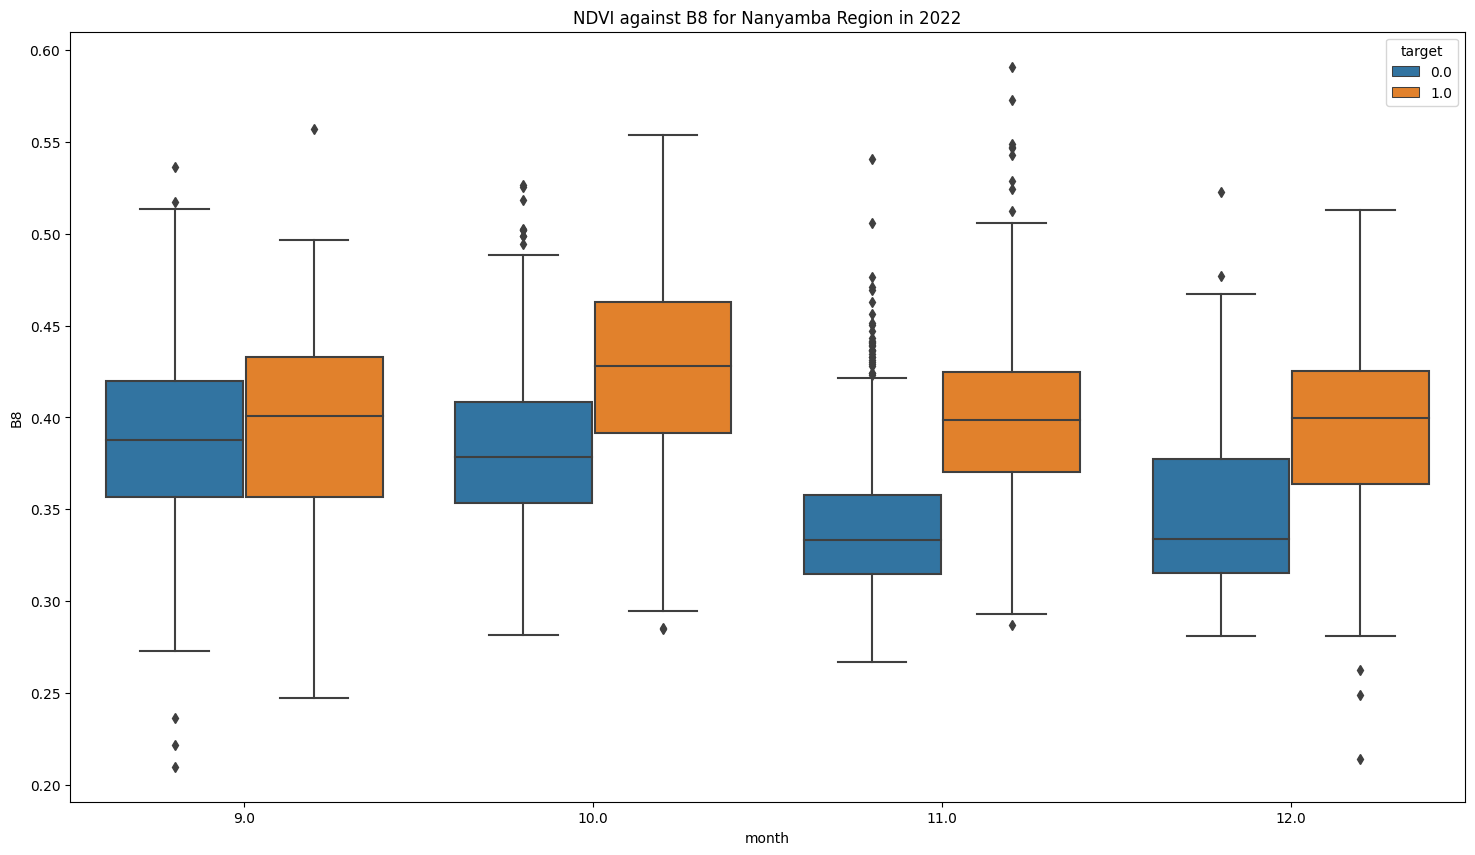

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8", hue="target").set(title='NDVI against B8 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B8A for Nanyamba Region in 2022')]

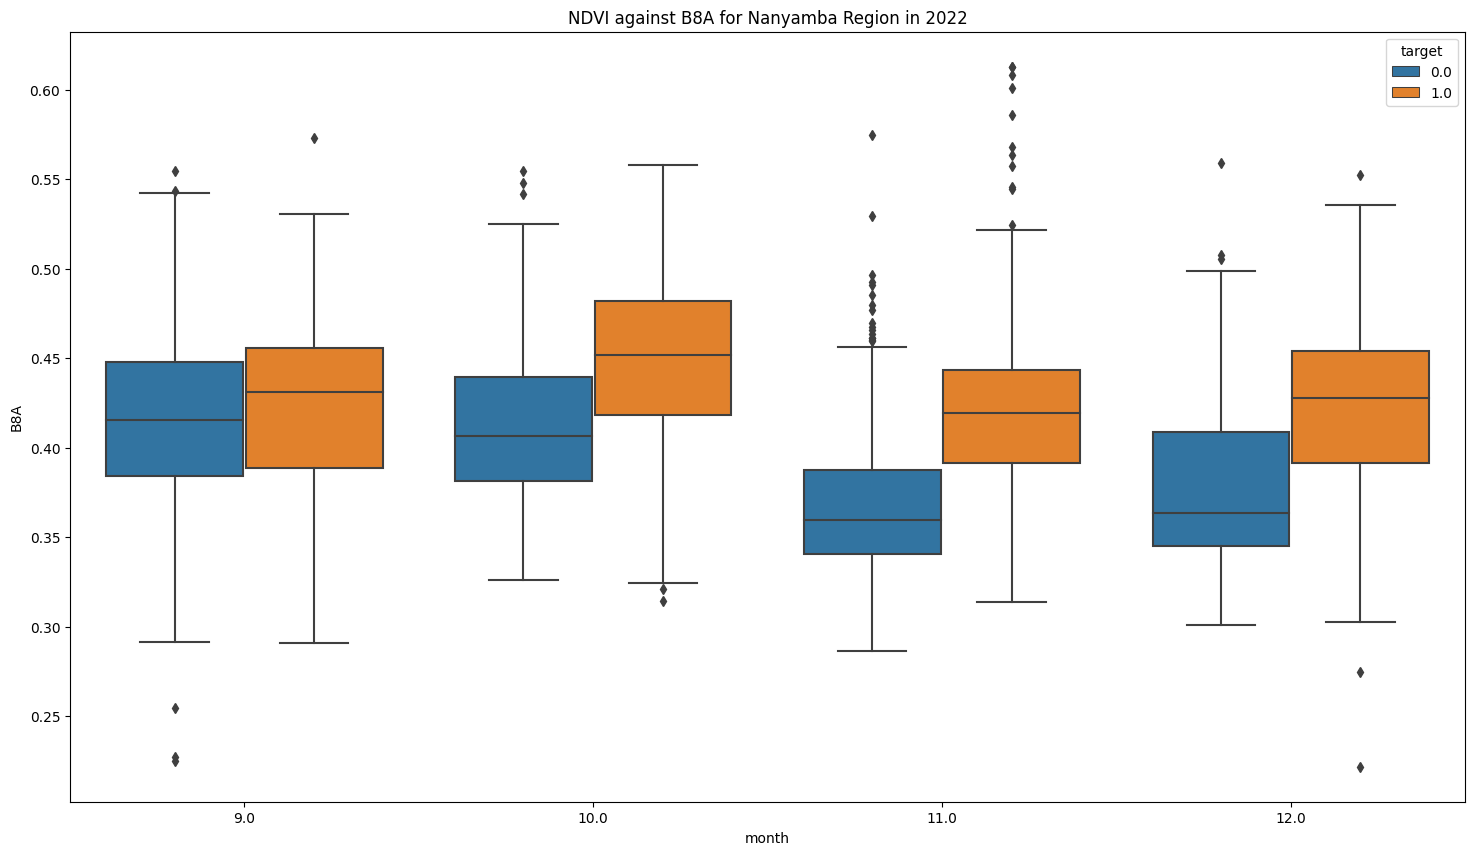

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B8A", hue="target").set(title='NDVI against B8A for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B9 for Nanyamba Region in 2022')]

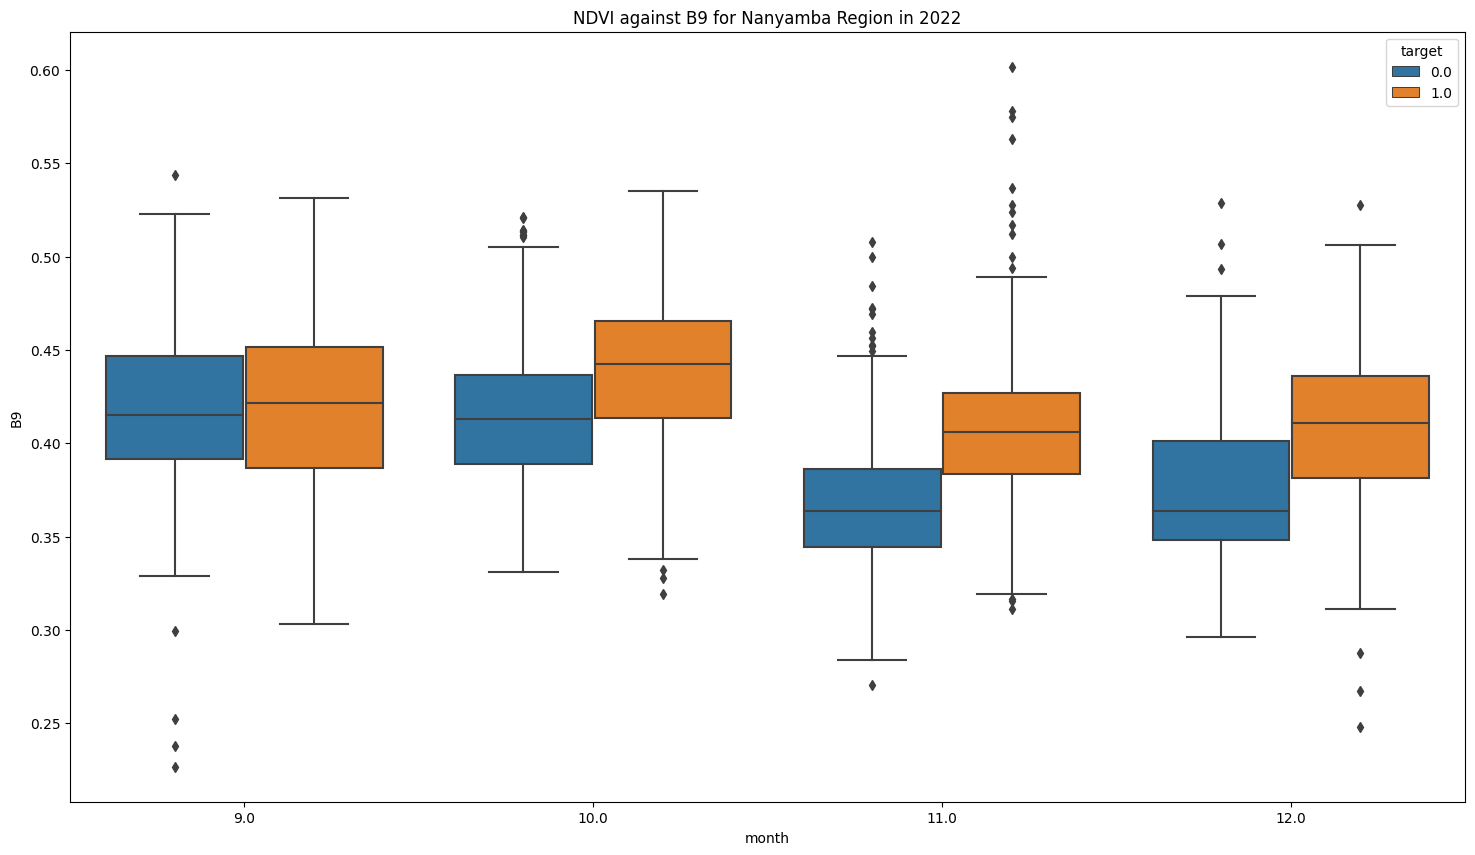

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B9", hue="target").set(title='NDVI against B9 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B11 for Nanyamba Region in 2022')]

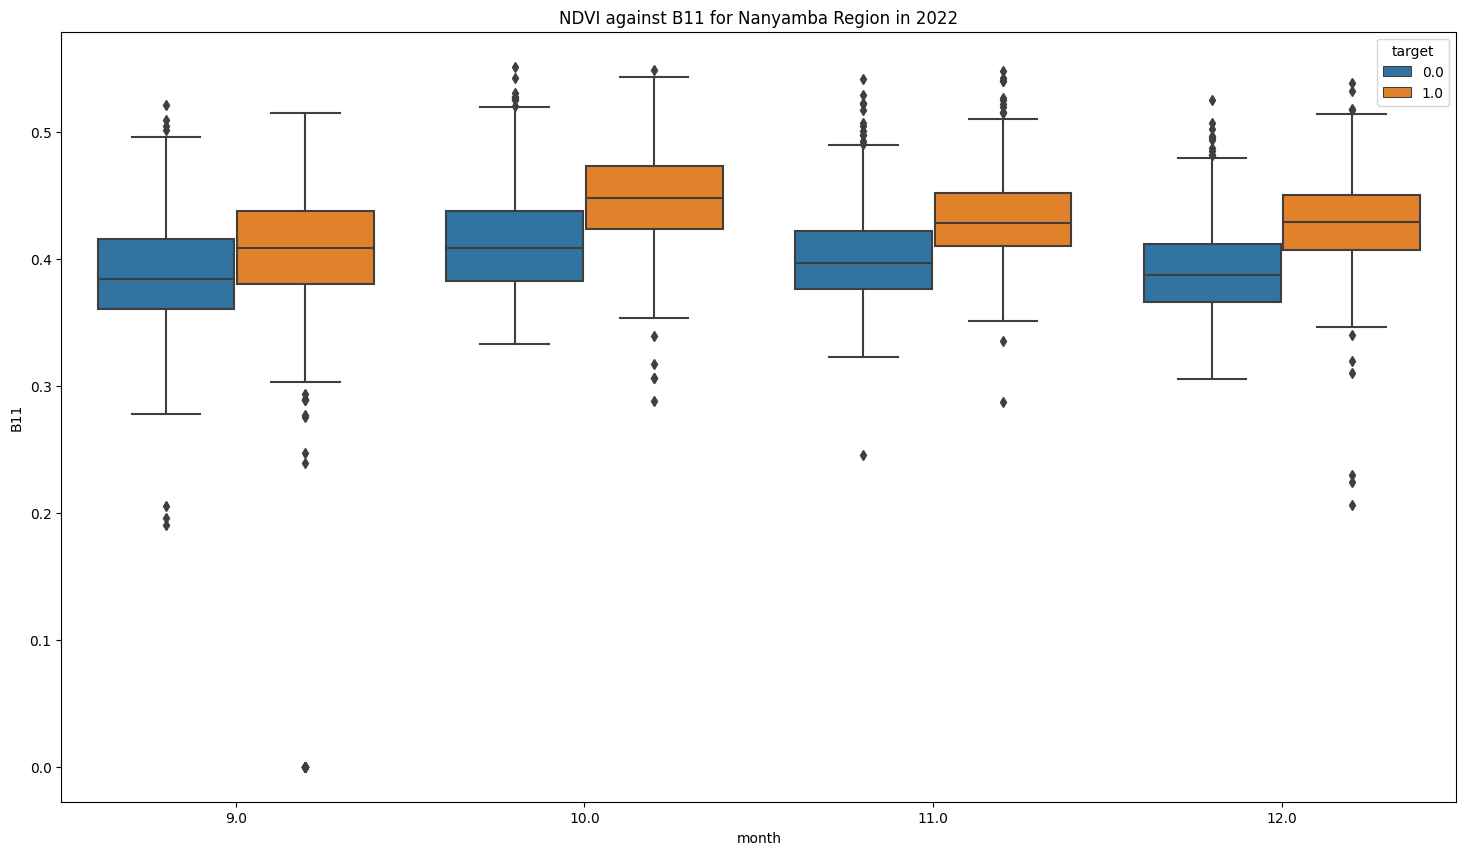

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B11", hue="target").set(title='NDVI against B11 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI against B12 for Nanyamba Region in 2022')]

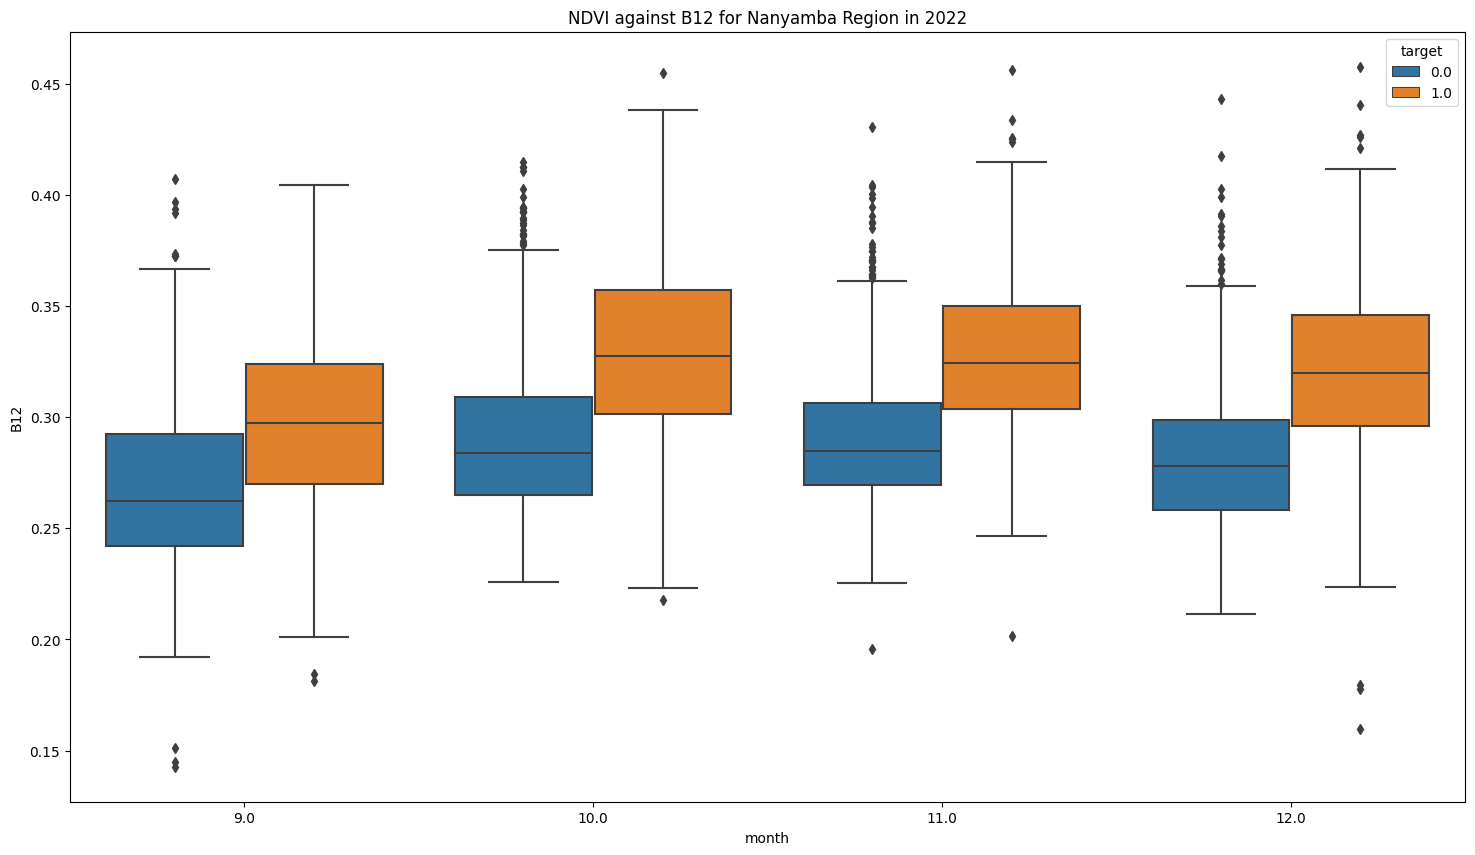

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="B12", hue="target").set(title='NDVI against B12 for Nanyamba Region in 2022')

In [ ]:
# spectral bands against ndvi

In [ ]:
#df_1 =dataframe1[(dataframe1['cluster']=="Mtwara DC 01-11")]


In [ ]:
#df_1

In [ ]:
#df_1[(df_1['cluster']=="Mtwara DC 01-11")]



In [ ]:
#table1 = pd.pivot_table(data=df_1,index=['cluster'])
#table1

In [ ]:
# multiple indexes

#table2 = pd.pivot_table(df_1,index=['target','cluster'])
#table2

In [ ]:
#table2.reset_index()

In [ ]:
#fig, ax = plt.subplots(figsize=(24,10))
#sns.histplot(x ='cluster',hue='target' , data = table2 )

In [ ]:
#table1.plot(kind='bar')

In [ ]:
#table2.plot(kind='bar')

In [ ]:
#trees_df

In [ ]:
#df_2=trees_df

[Text(0.5, 1.0, 'NDVI against B4 for Nanyamba Region in 2022')]

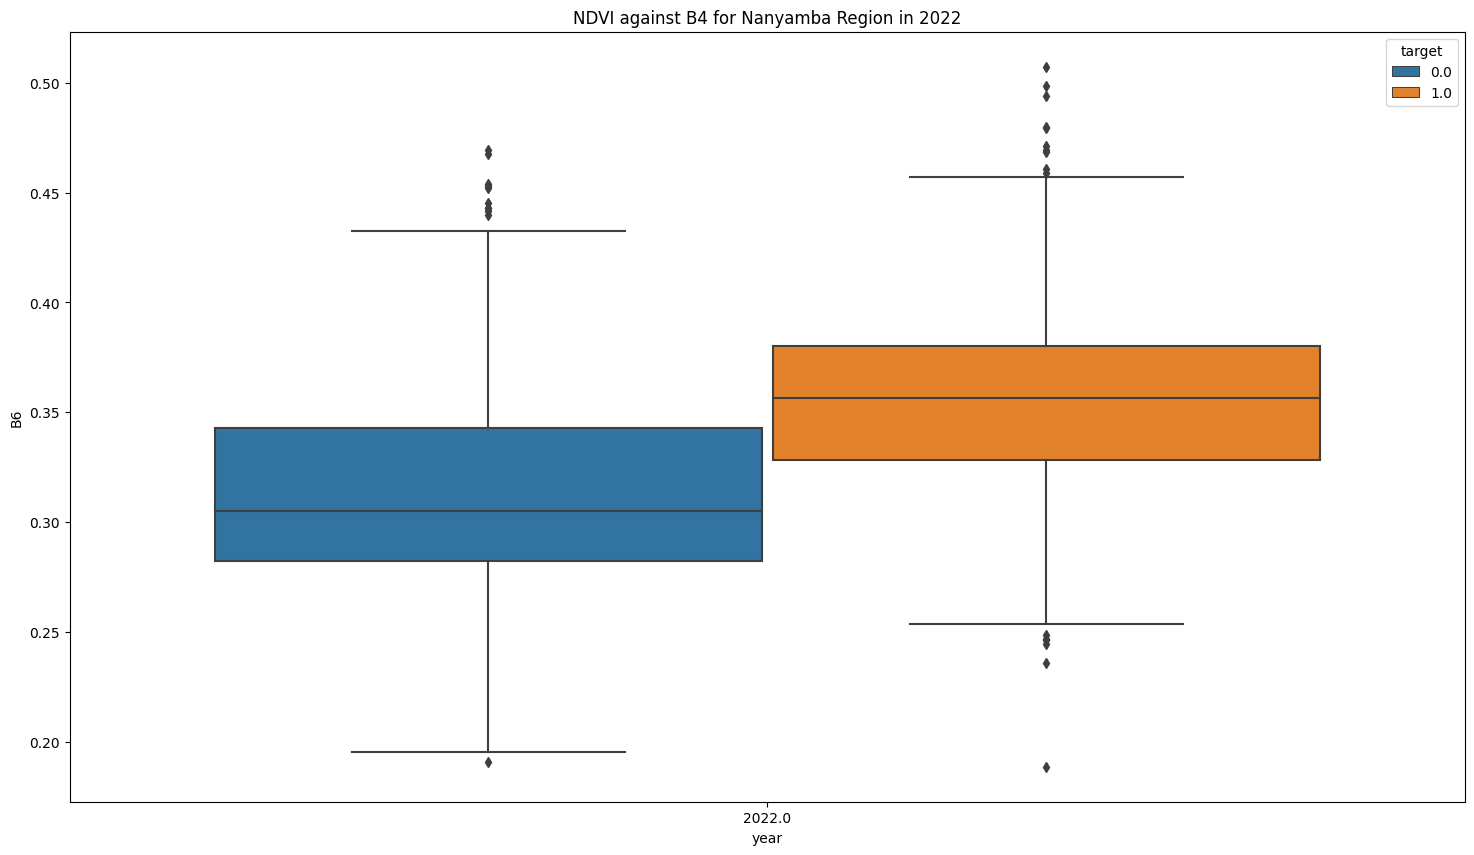

In [ ]:
# by month
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="year", y="B6", hue="target").set(title='NDVI against B4 for Nanyamba Region in 2022')

[Text(0.5, 1.0, 'NDVI for Nanyamba Region Clusters in 2022')]

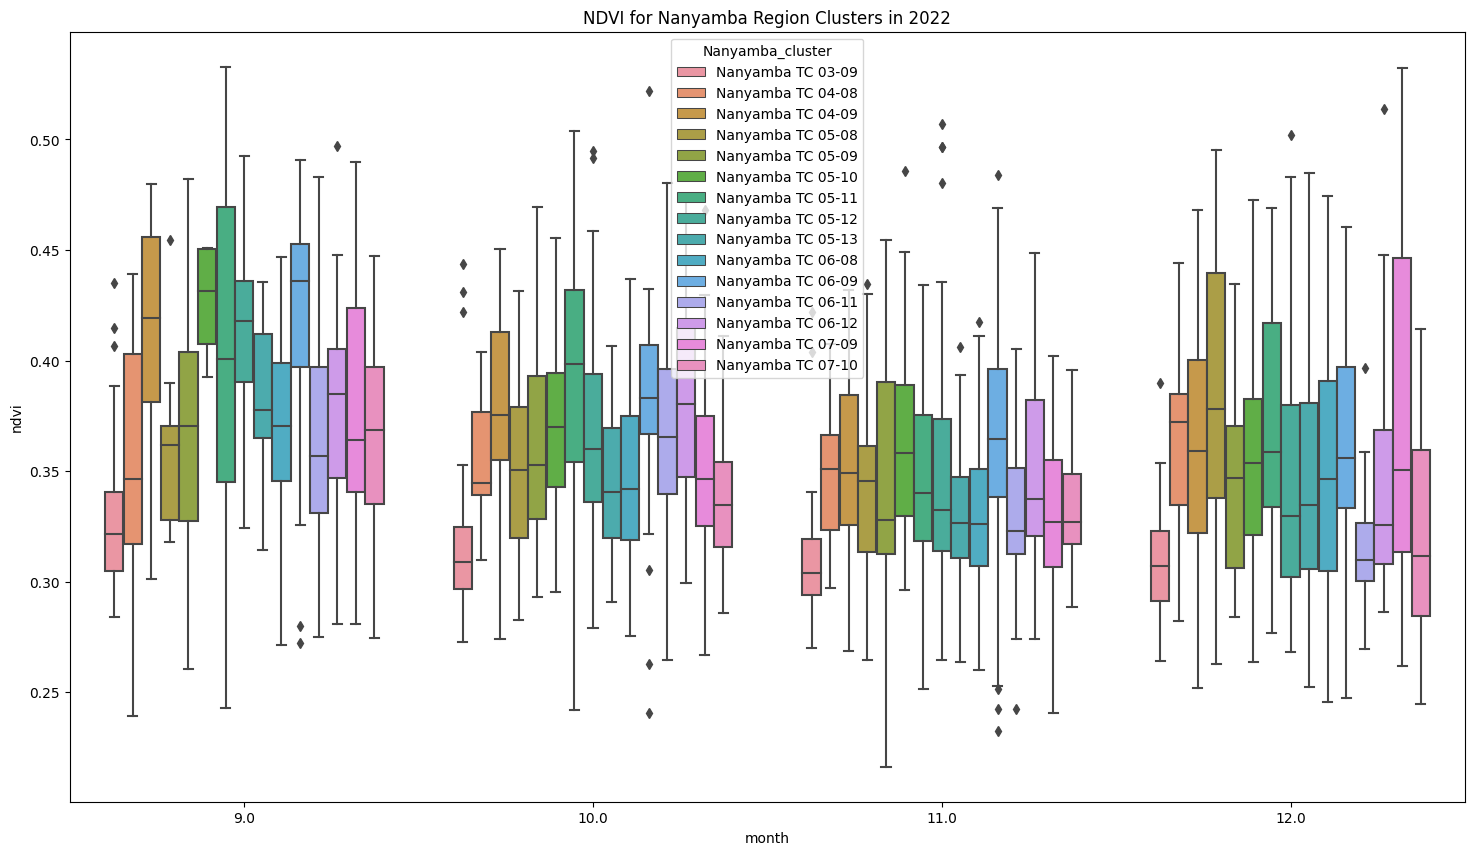

In [ ]:
#
plt.figure(figsize=(18, 10))

sns.boxplot(data=trees_df, x="month", y="ndvi", hue="Nanyamba_cluster").set(title='NDVI for Nanyamba Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Nanyamba Region Clusters in 2022')]

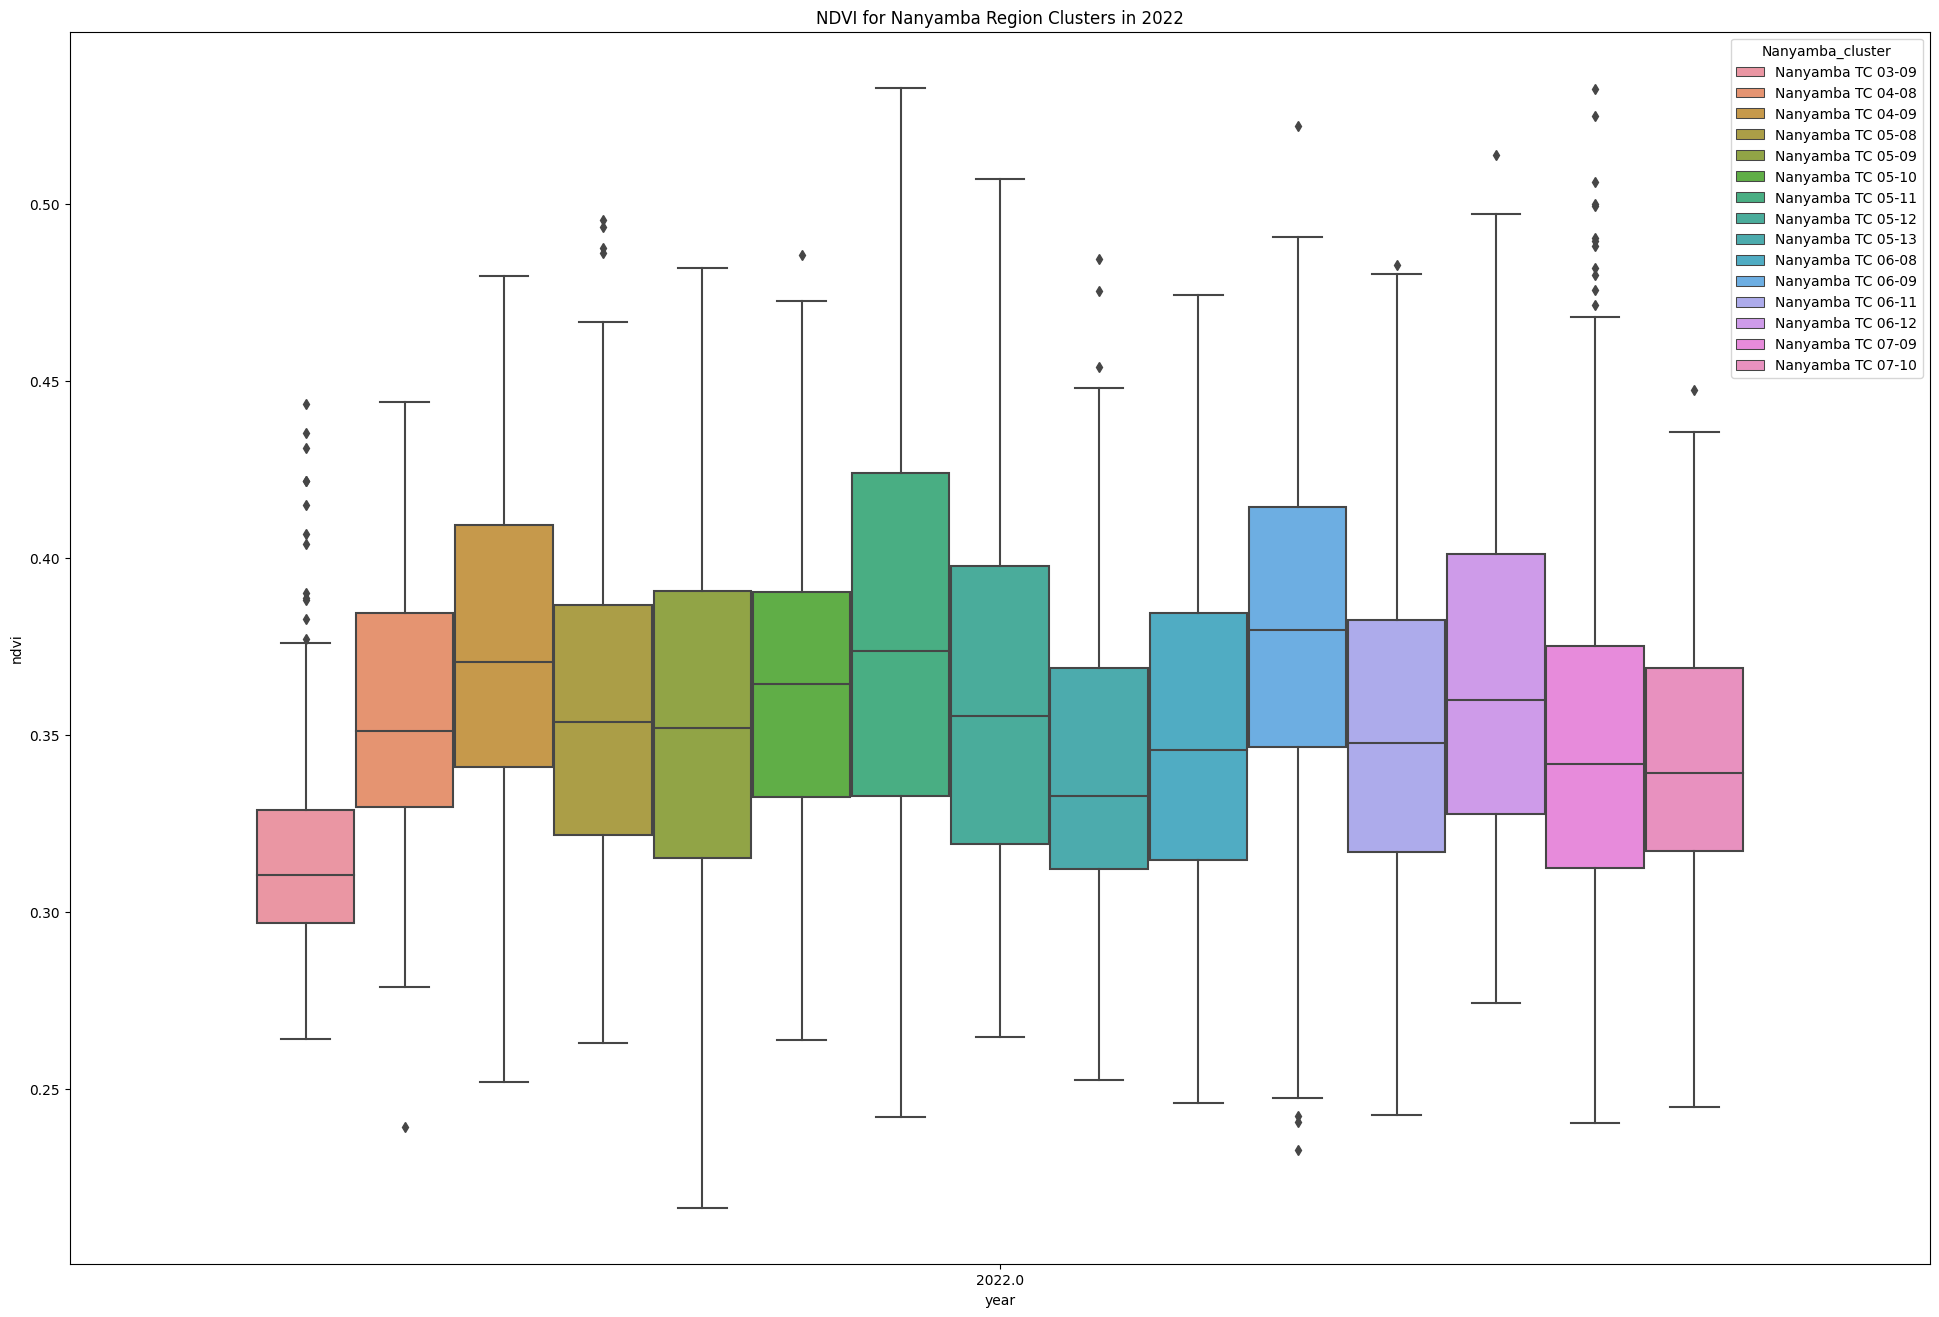

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="ndvi", hue="Nanyamba_cluster").set(title='NDVI for Nanyamba Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Nanyamba Region Clusters in 2022')]

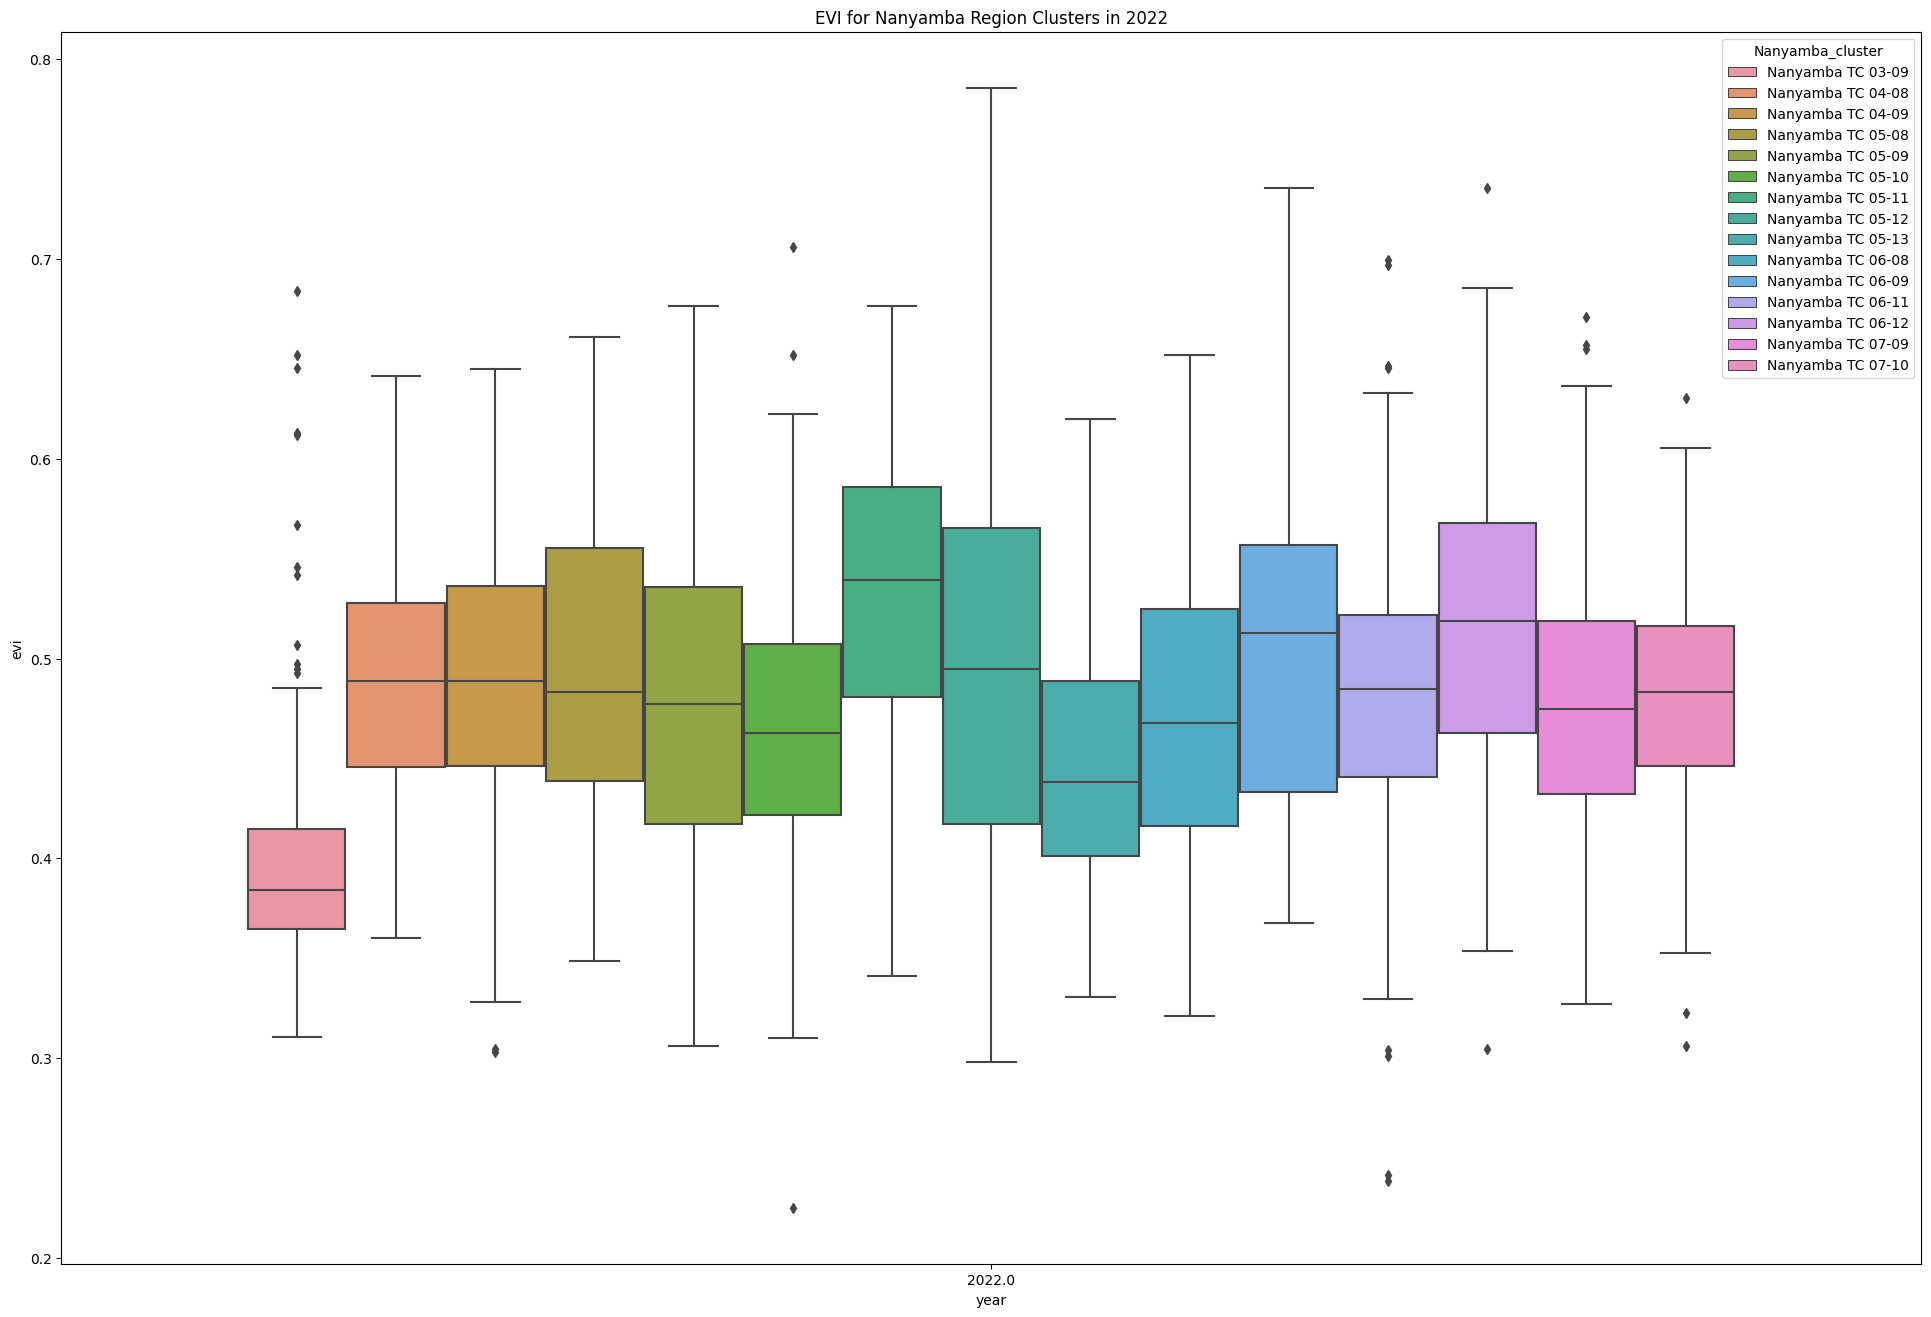

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="year", y="evi", hue="Nanyamba_cluster").set(title='EVI for Nanyamba Region Clusters in 2022')

[Text(0.5, 1.0, 'NDVI for Nanyamba Region Clusters in 2022')]

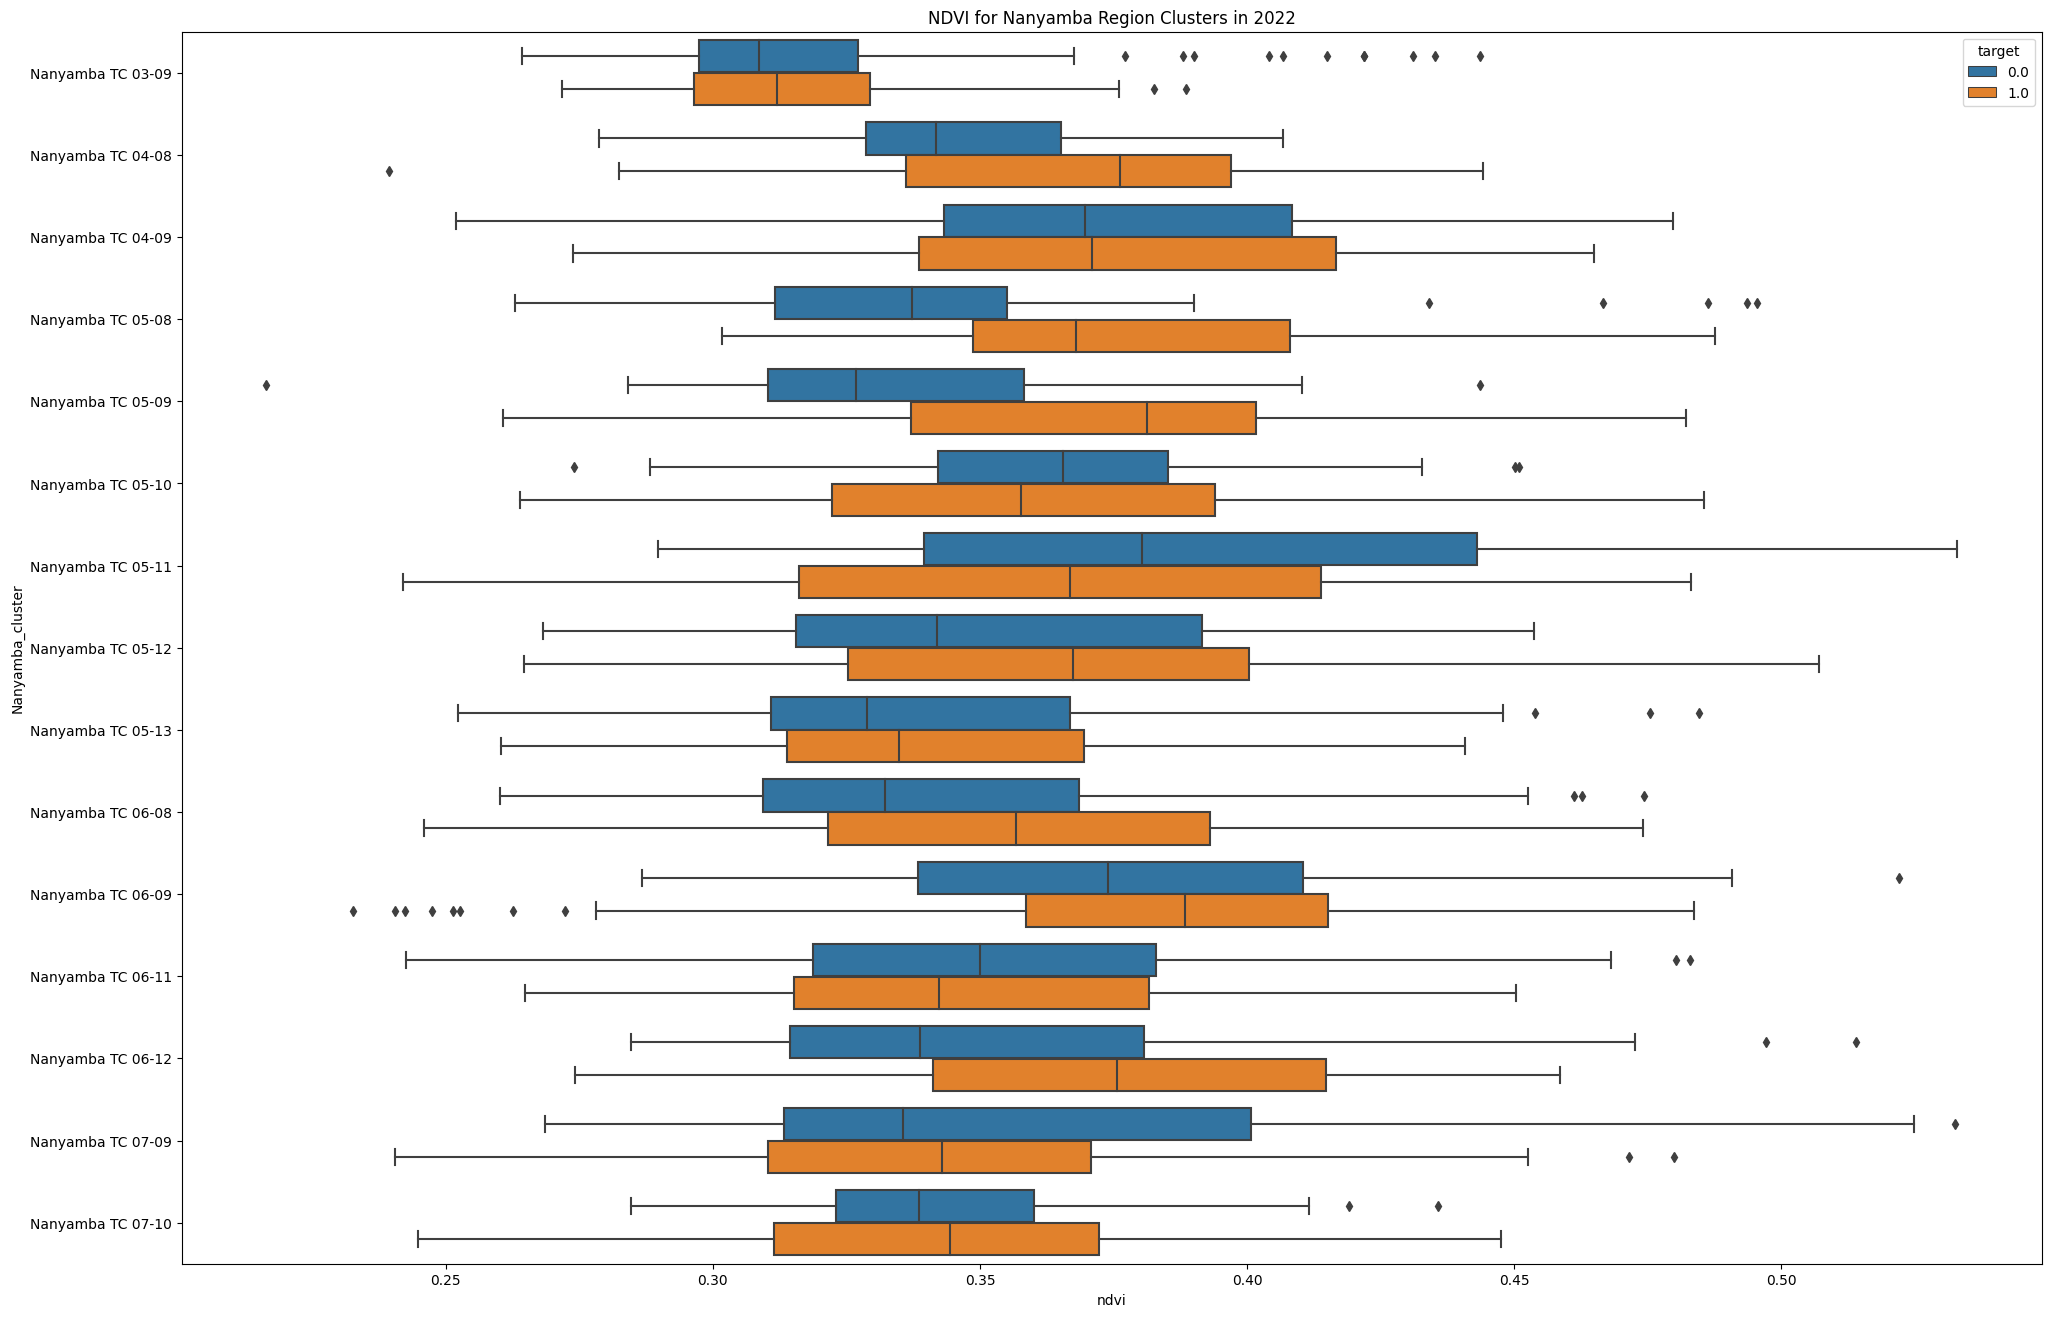

In [ ]:
#
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="ndvi", y="Nanyamba_cluster", hue="target").set(title='NDVI for Nanyamba Region Clusters in 2022')

[Text(0.5, 1.0, 'EVI for Nanyamba Region by cluster in 2022')]

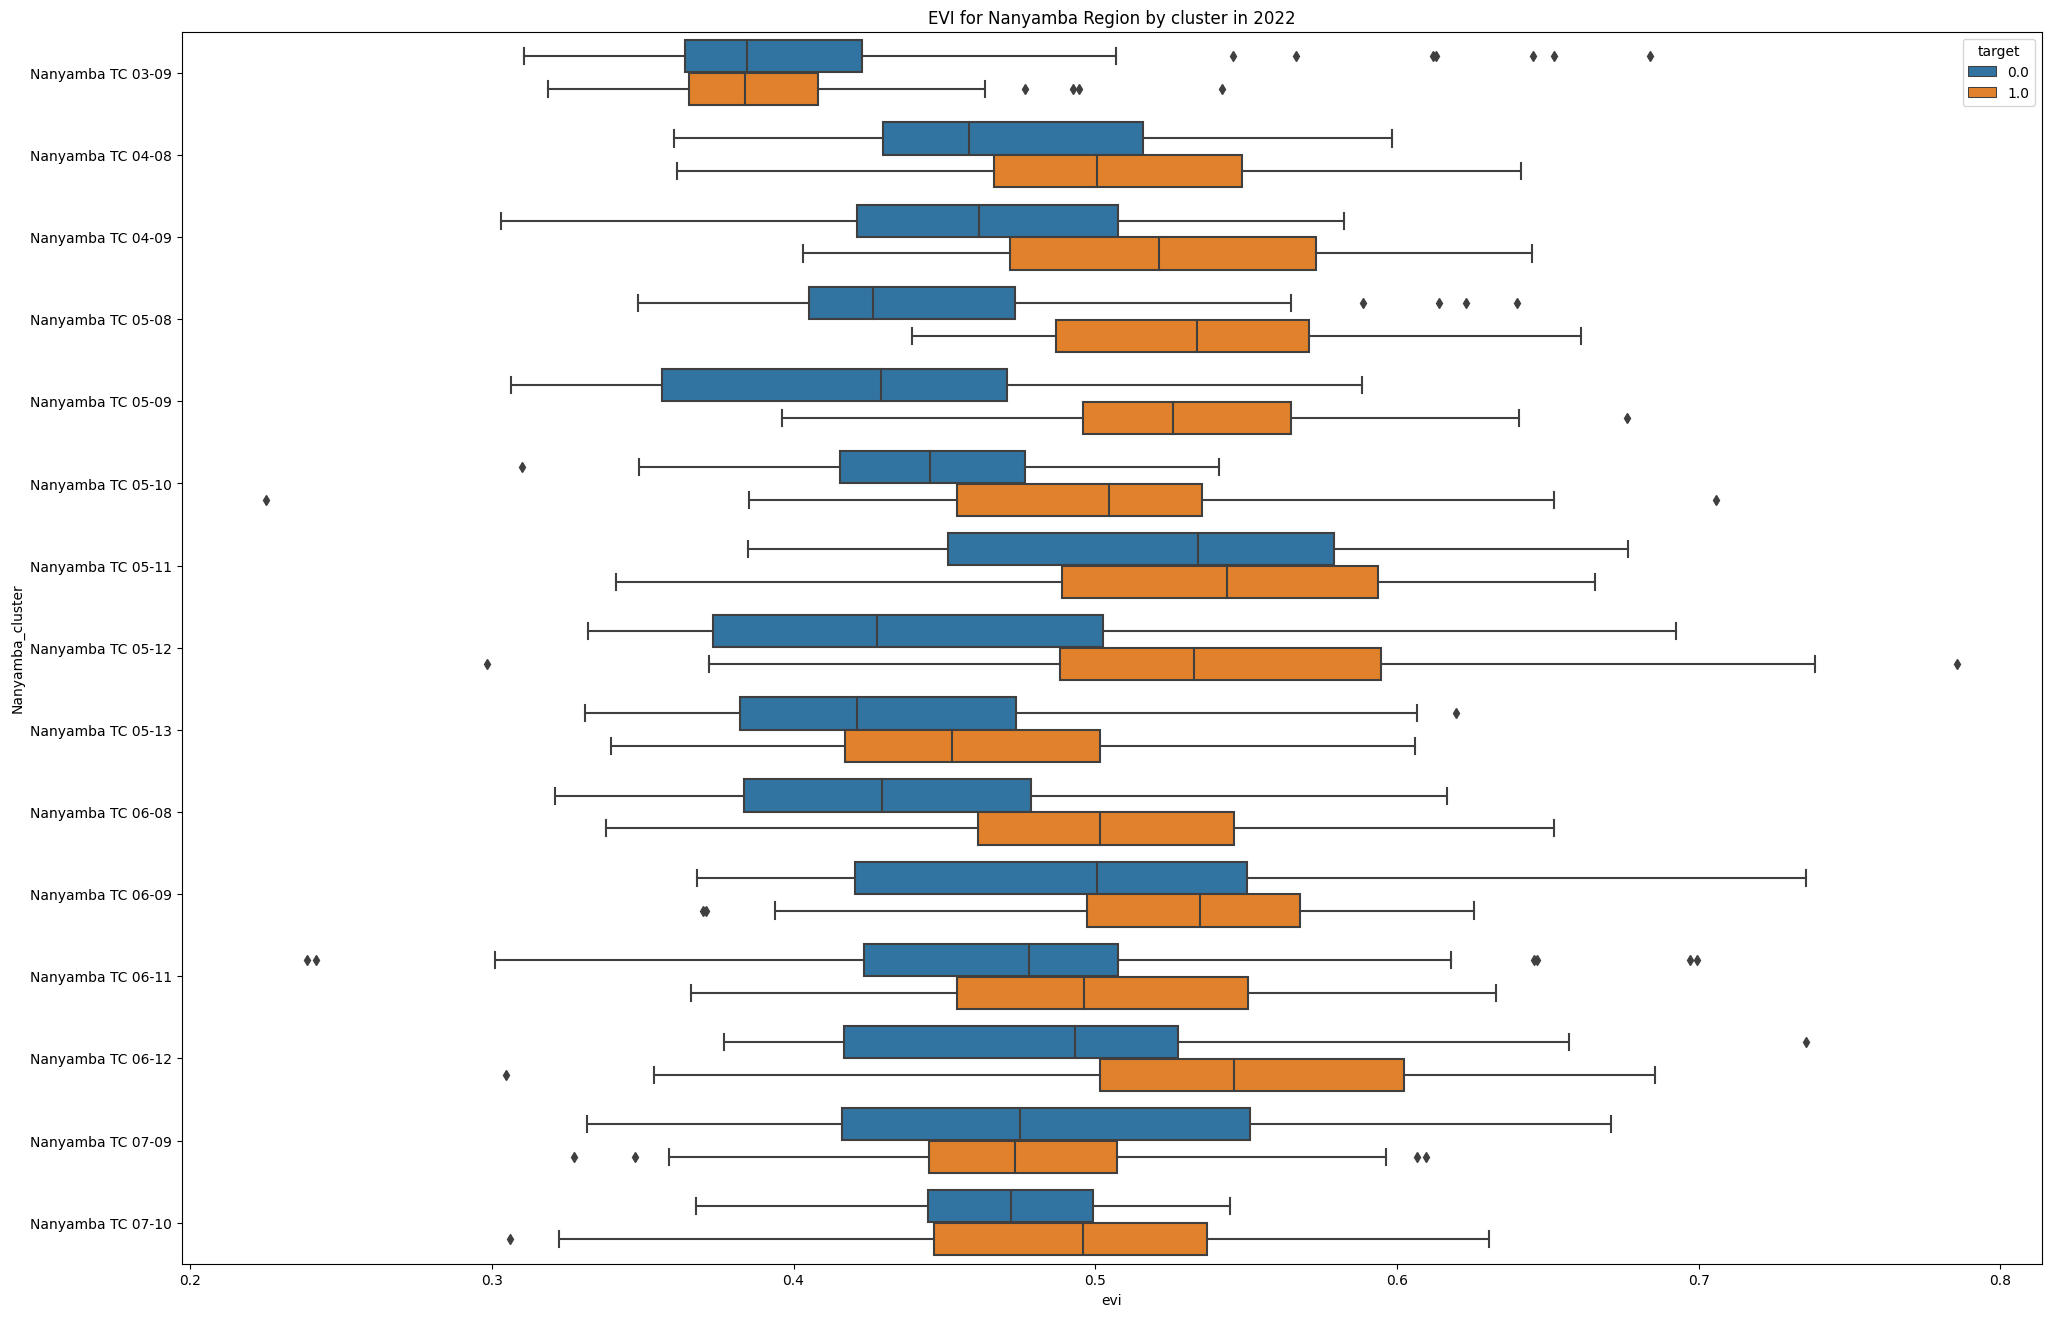

In [ ]:
# by month
plt.figure(figsize=(24, 16))

sns.boxplot(data=trees_df, x="evi", y="Nanyamba_cluster", hue="target").set(title='EVI for Nanyamba Region by cluster in 2022')

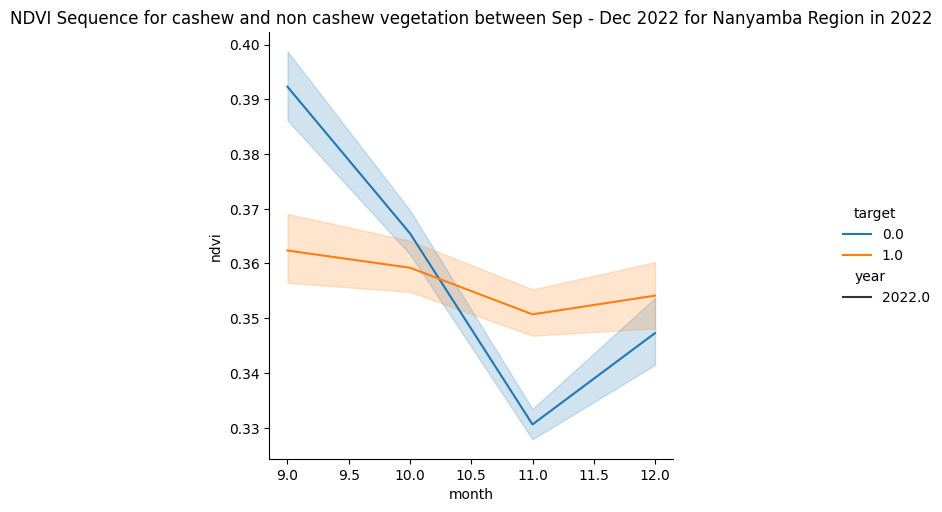

In [ ]:
sns.relplot(data=trees_df, x="month", y="ndvi", hue="target", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Nanyamba Region in 2022')

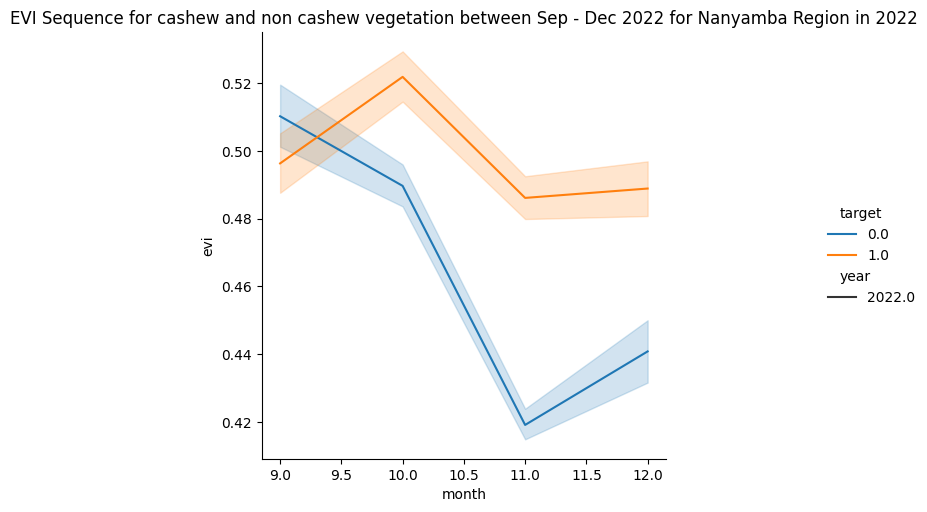

In [ ]:
sns.relplot(data=trees_df, x="month", y="evi", hue="target", kind="line", style= 'year').set(title='EVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Nanyamba Region in 2022')

In [ ]:
chatgpt, 3.5

NameError: ignored

<Figure size 1800x1000 with 0 Axes>

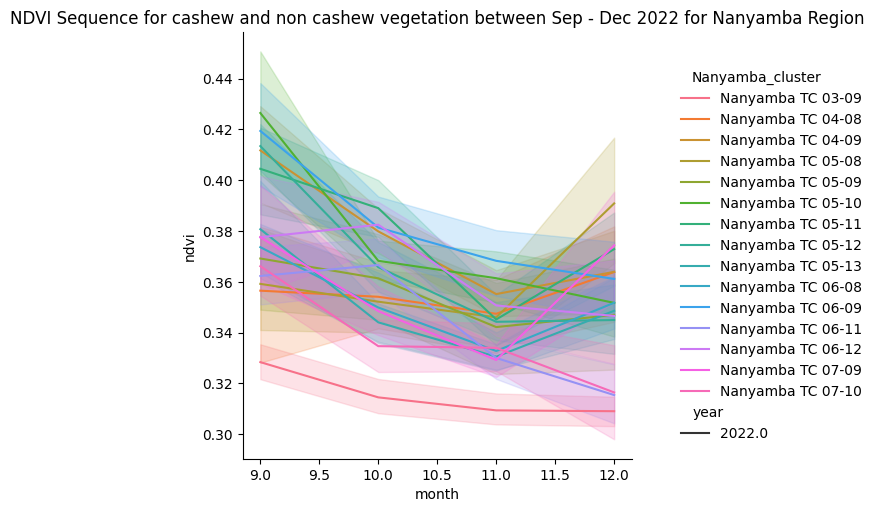

In [ ]:
plt.figure(figsize=(18, 10))
sns.relplot(data=trees_df, x="month", y="ndvi", hue="Nanyamba_cluster", kind="line", style= 'year').set(title='NDVI Sequence for cashew and non cashew vegetation between Sep - Dec 2022 for Nanyamba Region')

## Preparing Data For Modeling

In [ ]:
trees_df.head(4)

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.151550,0.361650,0.250200,0.148450,0.162675,0.16700,0.209275,0.25945,0.288850,0.30495,0.332250,0.347900,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.330996,1.0,2022.0,0.381904
1,0.151150,0.376050,0.262725,0.151675,0.165125,0.17305,0.218350,0.26615,0.293225,0.30995,0.337650,0.345550,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.322303,1.0,2022.0,0.381699
2,0.150975,0.376650,0.260475,0.147650,0.162300,0.16930,0.213425,0.26845,0.298075,0.31175,0.339100,0.346075,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.333989,1.0,2022.0,0.391190
3,0.162250,0.378725,0.264825,0.160000,0.171000,0.17690,0.217950,0.26555,0.288400,0.30510,0.332625,0.337750,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.305628,1.0,2022.0,0.364772


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from sentinelhub import SHConfig, WmsRequest, WcsRequest, BBox, CRS, DataCollection


In [ ]:
df_2 = trees_df[(trees_df['target']==1)]
df_2

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
0,0.151550,0.361650,0.250200,0.148450,0.162675,0.167000,0.209275,0.259450,0.288850,0.304950,0.332250,0.347900,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.330996,1.0,2022.0,0.381904
1,0.151150,0.376050,0.262725,0.151675,0.165125,0.173050,0.218350,0.266150,0.293225,0.309950,0.337650,0.345550,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.322303,1.0,2022.0,0.381699
2,0.150975,0.376650,0.260475,0.147650,0.162300,0.169300,0.213425,0.268450,0.298075,0.311750,0.339100,0.346075,Nanyamba TC 03-09,2022-09-04 07:43:02,247.0,9.0,0.333989,1.0,2022.0,0.391190
3,0.162250,0.378725,0.264825,0.160000,0.171000,0.176900,0.217950,0.265550,0.288400,0.305100,0.332625,0.337750,Nanyamba TC 03-09,2022-09-14 07:43:00,257.0,9.0,0.305628,1.0,2022.0,0.364772
4,0.176025,0.394000,0.287075,0.174575,0.183725,0.185850,0.224650,0.272400,0.300475,0.318350,0.341400,0.346750,Nanyamba TC 03-09,2022-09-29 07:42:50,272.0,9.0,0.295021,1.0,2022.0,0.365957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,0.153975,0.409675,0.324225,0.159050,0.187300,0.191925,0.252900,0.307000,0.325100,0.334225,0.356500,0.367075,Nanyamba TC 07-10,2022-11-13 07:42:53,317.0,11.0,0.300087,1.0,2022.0,0.385020
2990,0.157175,0.447150,0.356850,0.165750,0.199375,0.205400,0.269100,0.321025,0.354100,0.364300,0.383700,0.386650,Nanyamba TC 07-10,2022-11-28 07:42:49,332.0,11.0,0.302665,1.0,2022.0,0.414420
2991,0.187600,0.449425,0.320200,0.172400,0.213875,0.249850,0.303575,0.369125,0.397925,0.391800,0.438850,0.432825,Nanyamba TC 07-10,2022-09-04 07:43:02,247.0,9.0,0.274430,1.0,2022.0,0.444048
2992,0.186350,0.527400,0.368325,0.184075,0.200050,0.230400,0.286000,0.327025,0.355325,0.385400,0.414950,0.429775,Nanyamba TC 07-10,2022-10-14 07:42:54,287.0,10.0,0.285969,1.0,2022.0,0.431454


In [ ]:
df = df_2[(df_2['Nanyamba_cluster']=="Nanyamba TC 04-08")]
df


,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,datetime,day of year,month,ndvi,target,year,evi
268,0.168750,0.369525,0.272475,0.147325,0.174275,0.166850,0.226625,0.329575,0.377125,0.394350,0.405900,0.388650,Nanyamba TC 04-08,2022-09-04 07:43:02,247.0,9.0,0.417372,1.0,2022.0,0.517144
269,0.186325,0.425550,0.326925,0.175500,0.200400,0.194025,0.253675,0.341200,0.393075,0.416925,0.414475,0.396200,Nanyamba TC 04-08,2022-10-29 07:42:49,302.0,10.0,0.362284,1.0,2022.0,0.490570
270,0.164250,0.400975,0.309625,0.151550,0.184550,0.178375,0.240100,0.317675,0.350450,0.374775,0.374575,0.360625,Nanyamba TC 04-08,2022-11-13 07:42:53,317.0,11.0,0.354824,1.0,2022.0,0.443084
271,0.167475,0.401600,0.308050,0.158200,0.187400,0.178650,0.238700,0.331575,0.373625,0.390000,0.397800,0.401000,Nanyamba TC 04-08,2022-12-18 07:42:49,352.0,12.0,0.380172,1.0,2022.0,0.484920
272,0.173250,0.404875,0.321225,0.168150,0.192075,0.191725,0.254225,0.350125,0.376200,0.411050,0.419050,0.397050,Nanyamba TC 04-08,2022-12-18 07:42:49,352.0,12.0,0.372191,1.0,2022.0,0.502281
273,0.166200,0.383125,0.277525,0.138625,0.159775,0.158125,0.220875,0.332075,0.367975,0.386925,0.405675,0.402300,Nanyamba TC 04-08,2022-09-04 07:43:02,247.0,9.0,0.439074,1.0,2022.0,0.529638
274,0.195800,0.439475,0.339350,0.172425,0.193450,0.196125,0.264725,0.373850,0.409325,0.445725,0.449800,0.430650,Nanyamba TC 04-08,2022-10-29 07:42:49,302.0,10.0,0.392731,1.0,2022.0,0.548789
275,0.172575,0.407300,0.306275,0.144000,0.170000,0.175050,0.242725,0.342375,0.369775,0.407250,0.403750,0.390050,Nanyamba TC 04-08,2022-11-13 07:42:53,317.0,11.0,0.395128,1.0,2022.0,0.501019
276,0.172550,0.406275,0.306125,0.152225,0.180000,0.174325,0.241475,0.369275,0.430050,0.451500,0.446925,0.427800,Nanyamba TC 04-08,2022-12-18 07:42:49,352.0,12.0,0.438793,1.0,2022.0,0.574893
277,0.151825,0.397150,0.272875,0.143525,0.167850,0.168975,0.228125,0.321600,0.354800,0.381400,0.397150,0.404425,Nanyamba TC 04-08,2022-09-04 07:43:02,247.0,9.0,0.403047,1.0,2022.0,0.498770


In [ ]:
# relieve noisy columns
df = df.drop(['B1', 'B3', 'year', 'datetime', 'day of year', 'evi', 'month'], axis=1)

In [ ]:
df.head(2)

,B11,B12,B2,B4,B5,B6,B7,B8,B8A,B9,Nanyamba_cluster,ndvi,target
268,0.369525,0.272475,0.147325,0.166850,0.226625,0.329575,0.377125,0.394350,0.405900,0.38865,Nanyamba TC 04-08,0.417372,1.0
269,0.425550,0.326925,0.175500,0.194025,0.253675,0.341200,0.393075,0.416925,0.414475,0.39620,Nanyamba TC 04-08,0.362284,1.0


In [ ]:
X = df[[ 'B6', 'B7', 'B8', 'B9', 'B8A', ]]
y = df[['ndvi']]

In [ ]:
len(X)

36

In [ ]:
len(y)

36

In [ ]:
# Create polynomial features
poly_regr = PolynomialFeatures(degree=4, include_bias=False)
#X_poly = poly_regr.fit_transform(X)
#p = LinearRegression() #polynomial command
#lin_reg_2.fit(X_poly, y)

In [ ]:
X = np.random.rand(100,1)
y = 5*((X)**(4)) + np.random.rand(100,1)

In [ ]:
# seperate out our x and y values
X_values = df[['B6', 'B8', 'B8A', 'B9']].values
y_values = df['ndvi'].values

In [ ]:
#define our polynomial model, with whatever degree we want
degree=4

In [ ]:
# PolynomialFeatures will create a new matrix consisting of all polynomial combinations
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

In [ ]:

# transform out polynomial features
poly_X_values = poly_model.fit_transform(X_values)

In [ ]:
# should be in the form [1, a, b, a^2, ab, b^2]
print(f'initial values {X_values[0]}\nMapped to {poly_X_values[0]}')

initial values [0.329575 0.39435  0.4059   0.38865 ]
Mapped to [1.         0.329575   0.39435    0.4059     0.38865    0.10861968
 0.1299679  0.13377449 0.12808932 0.15551192 0.16006666 0.15326413
 0.16475481 0.15775303 0.15104882 0.03579833 0.04283417 0.04408873
 0.04221504 0.05125284 0.05275397 0.05051202 0.05429907 0.05199146
 0.04978192 0.06132613 0.06312229 0.06043971 0.06497106 0.06220991
 0.0595661  0.06687398 0.06403196 0.06131072 0.05870512 0.01179824
 0.01411707 0.01453054 0.01391302 0.01689166 0.01738639 0.0166475
 0.01789561 0.01713508 0.01640687 0.02021156 0.02080353 0.01991942
 0.02141284 0.02050283 0.0196315  0.02203999 0.02110333 0.02020648
 0.01934774 0.02418396 0.02489227 0.0238344  0.02562134 0.02453248
 0.02348989 0.02637175 0.025251   0.02417788 0.02315037 0.02714415
 0.02599057 0.02488602 0.02382841 0.02281575]


In [ ]:
# let's fit the model
poly_model.fit(poly_X_values, y_values)

PolynomialFeatures(degree=4)

In [ ]:
# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_X_values, y_values)

y_pred = regression_model.predict(poly_X_values)

regression_model.coef_
mean_squared_error(y_values, y_pred, squared=False)

7.20794354369231e-12

Text(0.5, 1.0, 'Polynomial Regression for Cashew nut Vegetation on Nanyamba TC Cluster 04-08')

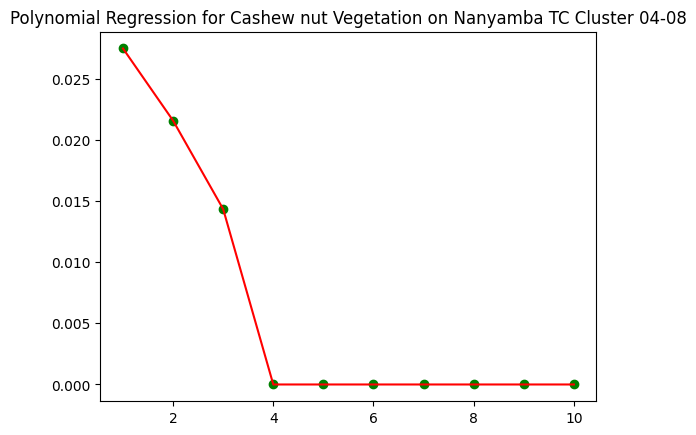

In [ ]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7,8,9,10]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)

   poly_X_values = poly_model.fit_transform(X_values)
   poly_model.fit(poly_X_values, y_values)

   regression_model = LinearRegression()
   regression_model.fit(poly_X_values, y_values)
   y_pred = regression_model.predict(poly_X_values)

   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")
plt.title('Polynomial Regression for Cashew nut Vegetation on Nanyamba TC Cluster 04-08')